# Research on Apartment Sale Listings

I was provided with the data from the "Yandex Real Estate" service — an archive of apartment sale listings in St. Petersburg and neighboring areas over several years. Each listed apartment comes with two types of data. The first type is user-provided, and the second is generated automatically based on the cartographic data, such as the distance to the city center, airport, nearest park, and water body.

Research objectives:

1. Determine the market value of real estate properties.
2. Develop an automated system to identify anomalies and potential fraudulent activities.
3. Ascertain the factors influencing the price formation of apartments.

Research approach:

The real estate data is located in the file named real_estate_data.csv. As the data quality is unknown, an initial data review will be necessary before diving into the research objectives.

I will inspect the data for errors and evaluate their potential impact on the objectives. During the data preprocessing phase, I will try to rectify any data errors that won't skew the final outcome. Following this, I'll introduce the necessary columns and embark on the exploratory data analysis.

My research will go in four stages:
* Data review
* Data preprocessing
* Exploratory data analysis
* Overall conclusion

### 1. Data Overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

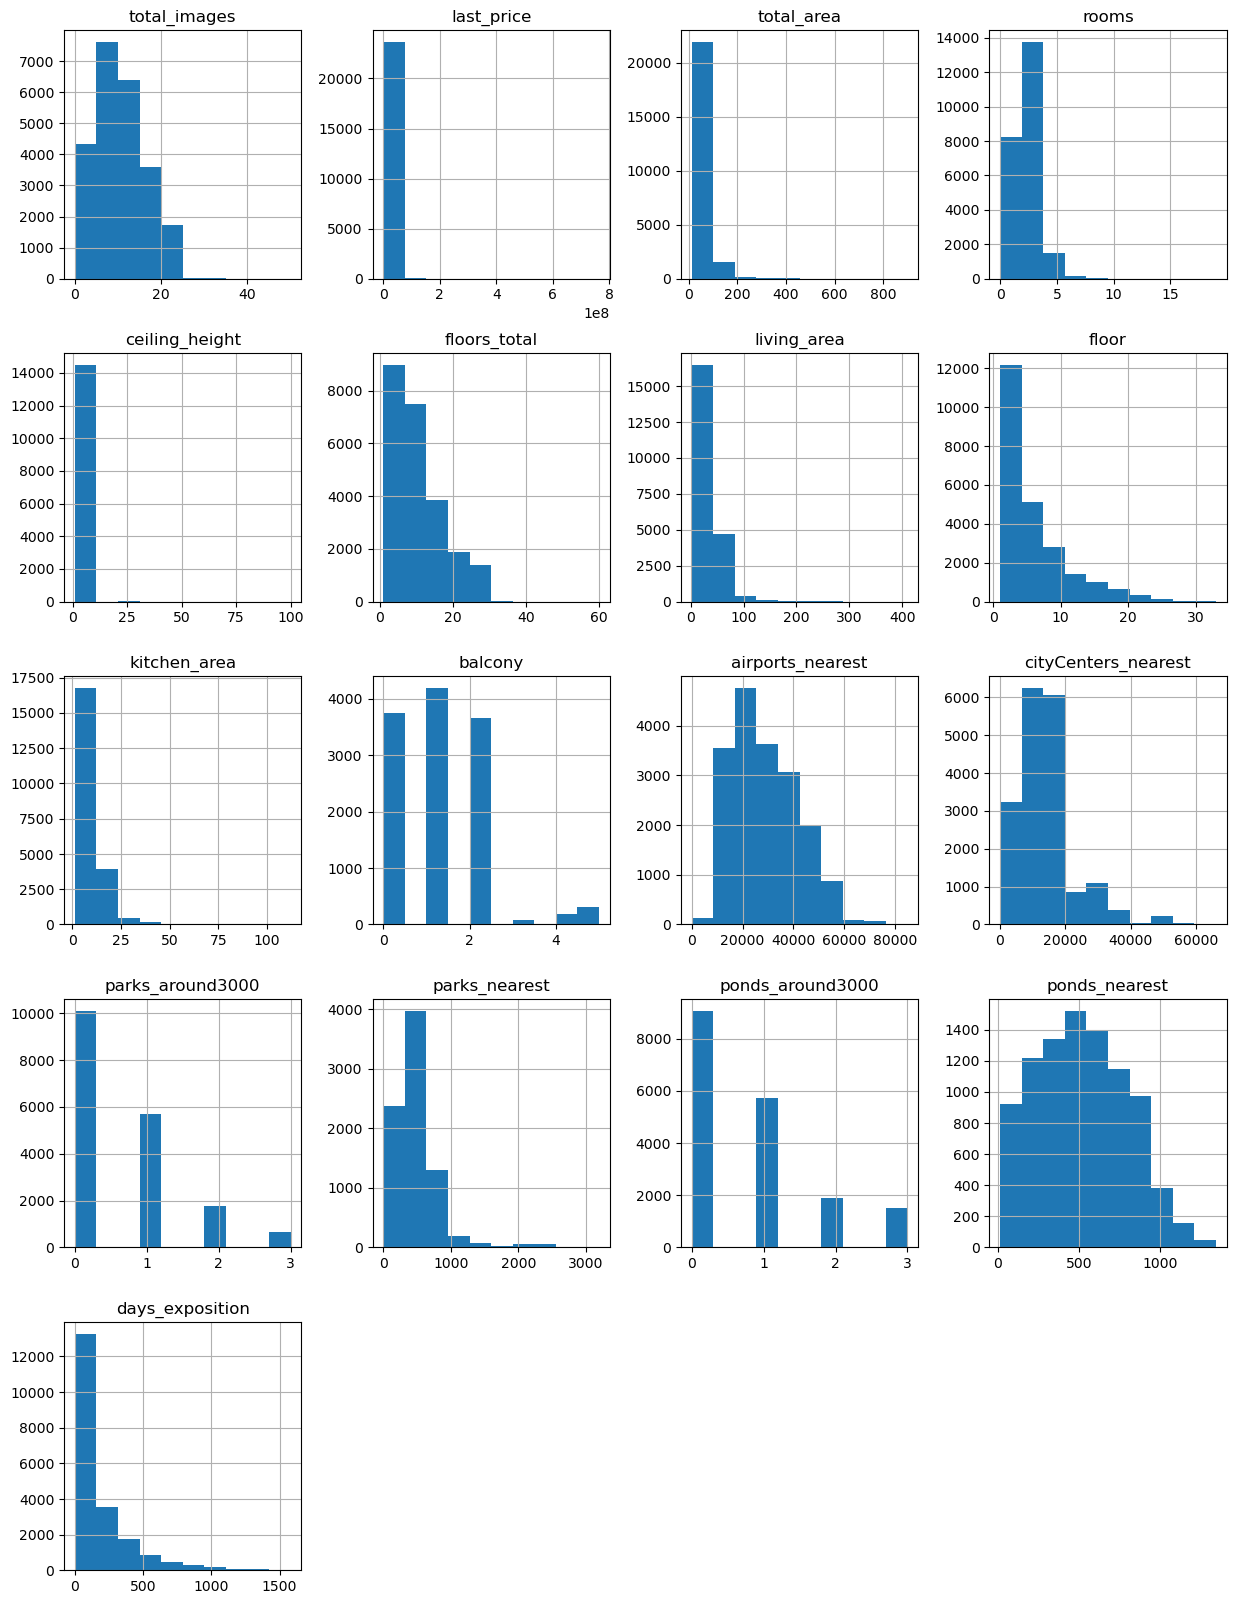

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

data = pd.read_csv('real_estate_data.csv',sep='\t')
data.info()
data.head(10)
data.hist(figsize=(15, 20));

###  2. Data Preprocessing

In [2]:
print(data.isna().sum()) # Determining which columns have missing values

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [3]:
# Determining the percentage of missing values
pd.DataFrame(round(data.isna().mean()*100,2)).style.format("{:.2f}").background_gradient('coolwarm')

,0
total_images,0.00
last_price,0.00
total_area,0.00
first_day_exposition,0.00
rooms,0.00
ceiling_height,38.80
floors_total,0.36
living_area,8.03
floor,0.00
is_apartment,88.29


####  2.1. Missing values were identified in the following columns:

- **ceiling_height:** 9195 missing values. Given the variability in ceiling heights, I'll leave the missing values as they are.

- **floors_total:** 86 missing values. The number of missing values is insignificant, so I'll delete the rows with missing values.

- **living_area:** 190 missing values. The number of missing values is insignificant, so I'll delete the rows with missing values.

- **is_apartment:** 2092 missing values. The column is almost filled (total values - 23699). However, where it is filled, it indicates False. Therefore, I can delete this column.

- **kitchen_area:** 2278 missing values. Based on construction standards, I can fill in the missing values.

- **balcony:** 11519 missing values. If it's not mentioned, that it's absent, I fill the missing values with zeros.

- **locality_name:** 49 missing values. I don't have information for filling, so I won't address these missing values.

- **airports_nearest:** 5542 missing values. I can fill this for each locality, except for Saint Petersburg (a large city where the distance to the airport can vary).

- **cityCenters_nearest:** 5519 missing values. I need to rename this column following naming conventions. I don't have information to fill in the missing values.

- **parks_around3000:** 5518 missing values. If the distance to the nearest park is filled and is less than 3000m, I'll use the values from the 'parks_nearest' column.

- **parks_nearest:** 15620 missing values. If in the 'parks_around3000' column it's mentioned that there is a park within 3000m from the apartment, then I'll fill the column with a value of 3000m.

- **ponds_around3000:** 5518 missing values. If the distance to the nearest pond is filled and is less than 3000m, I'll use the values from the 'ponds_nearest' column.

- **ponds_nearest:** 14589 missing values. If in the 'ponds_around3000' column it's noted that there's a pond within 3000m of the apartment, then I'll fill the column with a value of 3000m.

- **days_exposition:** 3181 missing values. I'll find the last day
                              

####  2.2. The data type analysis identified the following columns where the data type needs to be changed

1) Change from `float64` to `int64`:

- **last_price**
- **total_area**

2) Change from `object` to `date`:

- **first_day_exposition**

Changing data types is necessary when there's a requirement to interact with the data in a specific manner based on its type and use corresponding methods. In the case at hand, that's `first_day_exposition`.

Another situation necessitating specific data type changes is when it is needed to perform particular operations on specific data types: e.g., arithmetic calculations on integers or floating-point numbers, or string-based character searches.

In general, the data type should align with its values, which impoves performance, saves memory, and helps prevent errors.

For the columns `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, and `days_exposition`, it doesn't make sense to change the data type at this time since they contain missing values. I will do this as I proceed with possible data imputation.

In [4]:
# Change from float64 to int64
data['last_price'] = data['last_price'].astype('int64') 
data['total_area'] = data['total_area'].astype('int64') 
# Change from object to date
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
# Check the result
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  int64         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### 2.3. Deleting and replacing missing values

If the seller did not specify the number of balconies, then most likely, there are none in his apartment. I will replace such gaps with 0

In [5]:
data['balcony'] = data['balcony'].fillna(value='0')
data['balcony'] = data['balcony'].astype('int64') 

Removed the 'is_apartment' column, as it doesn't contain the information necessary for analysis

In [6]:
data = data.drop(columns='is_apartment')


In the columns 'floors_total' and 'living_area', the number of missing values is insignificant, so I will remove the corresponding rows.

In [67]:
data.dropna(subset=['living_area', 'floors_total'], inplace=True)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_kv_m,day_of_week,day_of_month,month,year,type_floor
0,20,13000000,108,2019-03-07,3,2.70,16,51.0,8,False,...,482,2,755.0,NaN,120370.37,3,7,March,2019,другой
1,7,3350000,40,2018-12-04,1,NaN,11,18.6,1,False,...,0,0,0,81.0,83750.00,1,4,December,2018,первый
2,10,5196000,56,2015-08-20,2,NaN,5,34.3,4,False,...,90,2,574.0,558.0,92785.71,3,20,August,2015,другой
4,2,10000000,100,2018-06-19,2,3.03,14,32.0,13,False,...,112,1,48.0,121.0,100000.00,1,19,June,2018,другой
5,10,2890000,30,2018-09-10,1,NaN,12,14.4,5,False,...,0,0,0,55.0,96333.33,0,10,September,2018,другой


The seller didn't provide the kitchen's size. Given that I have the total area (column `total_area` ) and the living space (column `living_area`), I can estimate the kitchen's size. I'll use a coefficient of 0.2 for this calculation (to account for other non-living spaces in the apartment like the hallway, bathroom, etc.). I will calculate the kitchen area only for those apartments that aren't studios or don't have an open floor plan (column `open_plan`).

In [8]:
data['kitchen_area'] = data['kitchen_area'].fillna(value='0')

def kitch(row):
    new_kitchen_area = row['kitchen_area']
    if row['kitchen_area'] == 0 and (row['studio'] == 'False' or row['open_plan'] == 'False'):
        new_kitchen_area = (row['total_area']-row['living_area'])*0.2
    return new_kitchen_area

data['kitchen_area'] = data.apply(kitch, axis=1)


Rename the column cityCenters_nearest:

In [9]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

Let's examine unique values in the column with locality names and eliminate implicit duplicates.

In [10]:
print('Number of unique values locality_name:', data['locality_name'].unique().shape[0])
print()
print(data['locality_name'].unique())


Number of unique values locality_name: 349

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Колпино' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный'
 'деревня Старая' 'деревня Лесколово' 'село Путилово' 'Ивангород' 'Мурино'
 'Сланцы' 'Шлиссельбург' 'Сясьстрой' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'поселок Новый Свет' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка' 'посёлок Бугры

In [11]:
for locality_name, locality_data in data.groupby('locality_name'):
    print('Name of the locality {} encountered {} times'.format(locality_name, len(locality_data)))


Name of the locality Бокситогорск encountered 10 times
Name of the locality Волосово encountered 35 times
Name of the locality Волхов encountered 92 times
Name of the locality Всеволожск encountered 371 times
Name of the locality Выборг encountered 193 times
Name of the locality Высоцк encountered 4 times
Name of the locality Гатчина encountered 292 times
Name of the locality Зеленогорск encountered 24 times
Name of the locality Ивангород encountered 25 times
Name of the locality Каменногорск encountered 11 times
Name of the locality Кингисепп encountered 71 times
Name of the locality Кириши encountered 90 times
Name of the locality Кировск encountered 78 times
Name of the locality Колпино encountered 328 times
Name of the locality Коммунар encountered 81 times
Name of the locality Красное Село encountered 167 times
Name of the locality Кронштадт encountered 91 times
Name of the locality Кудрово encountered 160 times
Name of the locality Лодейное Поле encountered 18 times
Name of the l

Data analysis allows me to conclude that the reasons for the appearance of duplicates are the following:
1. Replacing "ё" with "е" letters
2. Different designations of localities: "городской поселок" to "поселок городского типа"

In [12]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е') #  Replacing "ё" with "е"

In [13]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

Depending on the location of the real estate property, gaps in information regarding the distance to the airport, as well as the number of parks and bodies of water within a 3 km radius can be filled. For this purpose, median values for each locality can be used, except for St. Petersburg (a large city where the distance to the airport can vary).

In [14]:
print (data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8042
floors_total                0
living_area                 0
floor                       0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              43
airports_nearest         4913
city_centers_nearest     4892
parks_around3000         4891
parks_nearest           14262
ponds_around3000         4891
ponds_nearest           13360
days_exposition          2977
dtype: int64


In [15]:
data.dropna(subset=['locality_name'], inplace=True)

Fill in the gaps in the 'airports_nearest' column with zeros. Note that if the distance to the airport is filled out for any real estate object (excluding St. Petersburg), I will fill it with the maximum value (which will not differ much from the median) for other real estate objects.

In [16]:
data['airports_nearest'] = data['airports_nearest'].fillna(value='0')

def airport(near):
    near_dist = near.airports_nearest
    if near['locality_name'] != 'Санкт-Петербург' and near_dist == 0:   
        near_dist = data.groupby('locality_name')['airports_nearest'].max()
    return near_dist
    
data['airports_nearest'] = data.apply(airport, axis=1)

Fill in the gaps in the 'parks_around3000' column with a unit, if the distance to the nearest park is filled in and is less than 3000m. Fill in the gaps in the 'parks_nearest' column with a value of 3000m if the 'parks_around3000' column indicates that there is a park within 3000m from the apartment.

In [17]:
# Filling missing values with zeros in the column 'parks_around3000' 
data['parks_around3000'] = data['parks_around3000'].fillna(value='0') 

# Filling missing values with zeros in the column 'parks_nearest'
data['parks_nearest'] = data['parks_nearest'].fillna(value='0')  

def parks3000(distance):
    new_distance = distance['parks_around3000']
    if (int(distance['parks_nearest']) < 3000 and int(distance['parks_nearest']) > 0) and (new_distance == 0):   
        new_distance = 1
    return new_distance

# Filling in '1' in the 'parks_around3000' column for those real estate objects 
# for which there is information about their distance to a park.

data['parks_around3000'] = data.apply(parks3000, axis=1) 


def parks_hier(hier):
    hier_1 = hier['parks_nearest']
    if (int(hier['parks_around3000']) > 0 and int(hier_1) == 0):   
        hier_1 = 3000
    return hier_1

# Filling 1 in the 'parks_nearest' column for those real estate objects 
# for which there is information about the distance to the park 

data['parks_nearest'] = data.apply(parks_hier, axis=1) 

data['parks_around3000'] = data['parks_around3000'].astype('int64') 


Fill in the gaps in the column 'ponds_around3000' with one,
if the distance to the nearest pond is filled in and is less than 3000 m.

Fill in the gaps in the column 'ponds_nearest' with a value of 3000m,
if the column 'ponds_around3000' indicates that there is a pond within 3000 m from the apartment.

In [18]:
#Filling in missing values with zeros in the column'ponds_around3000' 
data['ponds_around3000'] = data['ponds_around3000'].fillna(value='0') 

#Filling in the missing values with zeros in the column'ponds_around3000' column and the column'ponds_nearest'
data['ponds_nearest'] = data['ponds_nearest'].fillna(value='0') 

def ponds3000(distance_2):
    new_distance_2 = distance_2['ponds_around3000']
    if (int(distance_2['ponds_nearest']) < 3000 and int(distance_2['ponds_nearest']) > 0) and (new_distance_2 == 0):   
        new_distance_2 = 1
    return new_distance_2
# Filling in 1 in the column 'ponds_around3000' column for those real estate properties 
# for which there is information about their distance to the pond 
    
data['ponds_around3000'] = data.apply(ponds3000, axis=1) 

def ponds_hier(row):
    hier_2 = row['ponds_nearest']
    if (int(row['ponds_around3000']) > 0 and int(hier_2) == 0):   
        hier_2 = 3000
    return hier_2

# Filling in '1' in the column 'ponds_nearest'  for those real estate properties 
# for which there is information about the distance to a pond

data['ponds_nearest'] = data.apply(ponds_hier, axis=1) 
data['ponds_around3000'] = data['ponds_around3000'].astype('int64') 


### 2.4. Analysis of Rare and Outlier Values

Rare and Outlying Values:
1) In the column `last_price`, the minimum and maximum values may be outliers.

2) In the column `total_area`, the minimum total area is specified as 12 sq.m, and the maximum is 900 sq.m. This suggests the presence of anomalies.

3) In the column `rooms`, the maximum number of rooms is specified as 19. While it is possible, further analysis is needed.

4) In the column `ceiling_height`, the minimum ceiling height is 1 meter, and the maximum is 100 meters. This indicates the presence of anomalies.

5) In the column `floors_total`, the maximum number of floors in a building is specified as 60. While it is possible, further analysis is needed.

6) In the column `living_area`, the minimum living area is specified as 2 sq.m, and the maximum is 409.7 sq.m. This suggests the presence of anomalies.

7) In the column `city_centers_nearest`, there are still a significant number of missing values, which I believe should not be deleted, as it would result in the loss of a large amount of data. However, it should be noted for further analysis that these are not outliers but rather missing values.

8) Similarly, in the column `airports_nearest`, there are a significant number of missing values, similar to the column `city_centers_nearest`.

In [19]:
data.isna().sum().head(20)

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          8013
floors_total               0
living_area                0
floor                      0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest    4885
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
dtype: int64

In [20]:
data.describe().round(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,balcony,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition
count,21700.00,2.170000e+04,21700.00,21700.00,13687.00,21700.00,21700.00,21700.00,21700.00,16815.00,21700.00,21700.00,18724.00
mean,10.03,6.499828e+06,59.83,2.07,2.77,10.65,34.45,5.88,0.62,14239.69,0.47,0.59,184.74
std,5.68,1.088467e+07,34.71,1.08,1.30,6.57,22.05,4.86,0.97,8671.44,0.75,0.88,221.37
min,0.00,1.219000e+04,12.00,0.00,1.00,1.00,2.00,1.00,0.00,181.00,0.00,0.00,1.00
25%,6.00,3.450000e+06,40.00,1.00,2.52,5.00,18.60,2.00,0.00,9294.00,0.00,0.00,44.00
50%,10.00,4.650000e+06,52.00,2.00,2.65,9.00,30.00,4.00,0.00,13107.00,0.00,0.00,101.00
75%,14.00,6.750000e+06,69.00,3.00,2.80,16.00,42.30,8.00,1.00,16267.50,1.00,1.00,238.00
max,50.00,7.630000e+08,900.00,19.00,100.00,60.00,409.70,33.00,5.00,65968.00,3.00,3.00,1580.00


#### 2.4.1. Analysis the data in the column 'last_price'

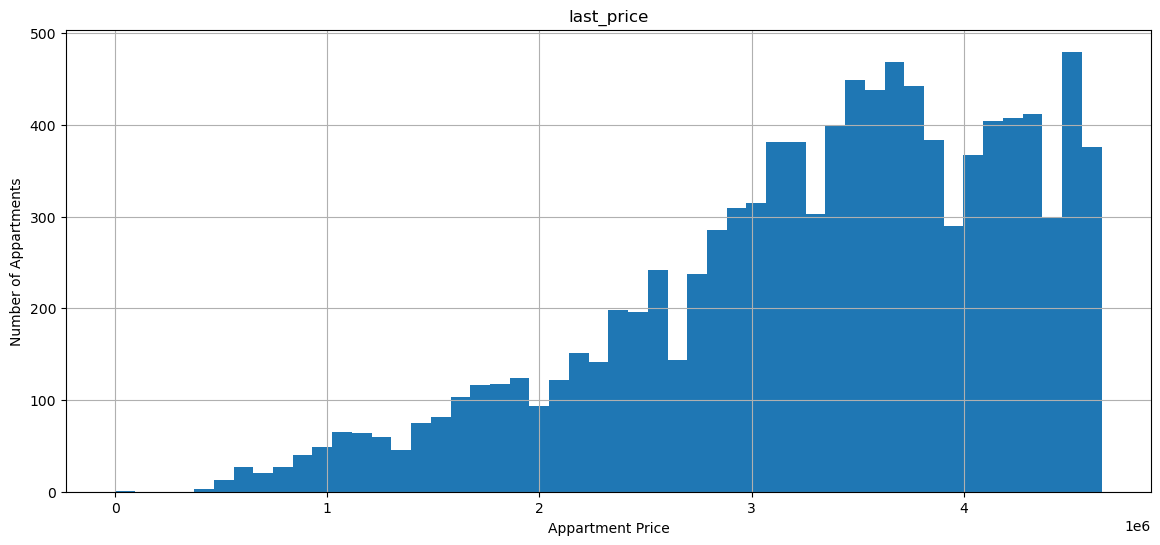

In [68]:
import matplotlib.pyplot as plt 
data.hist('last_price', bins = 50, range=(0,4.65e+06), figsize=(14, 6)) # Building a histogram with the total area value 
plt.grid=True                                                               
plt.xlabel('Appartment Price')
plt.ylabel('Number of Appartments')
plt.show()       

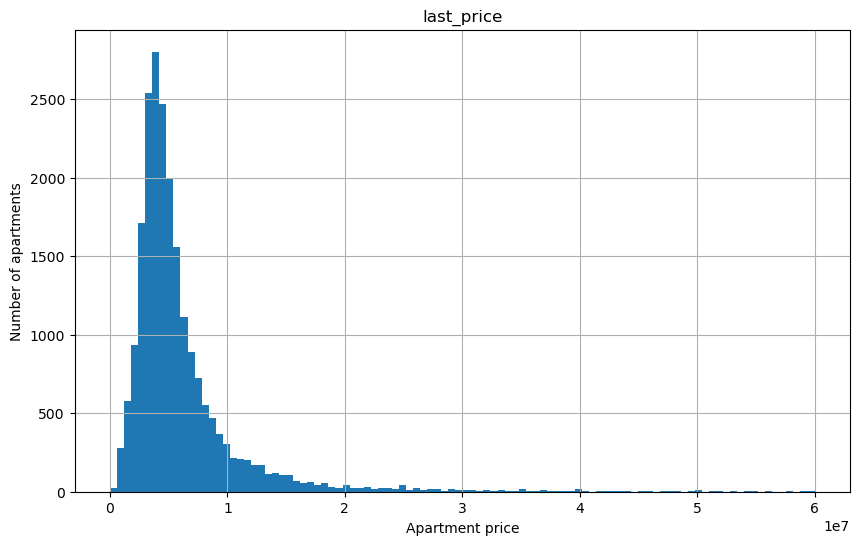

In [22]:
data.hist('last_price', bins = 100, range=(0, 6e+07), figsize=(10, 6))# Building a histogram with the total area values
plt.grid=True                                                               
plt.xlabel('Apartment price')
plt.ylabel('Number of apartments')
plt.show()       

From the graph, it can be inferred that there are no outliers among all the apartments. Apartments priced below 300,000 rubles can be considered as non-representative, as they are a rare occurrence. Therefore, information about them can be discarded.

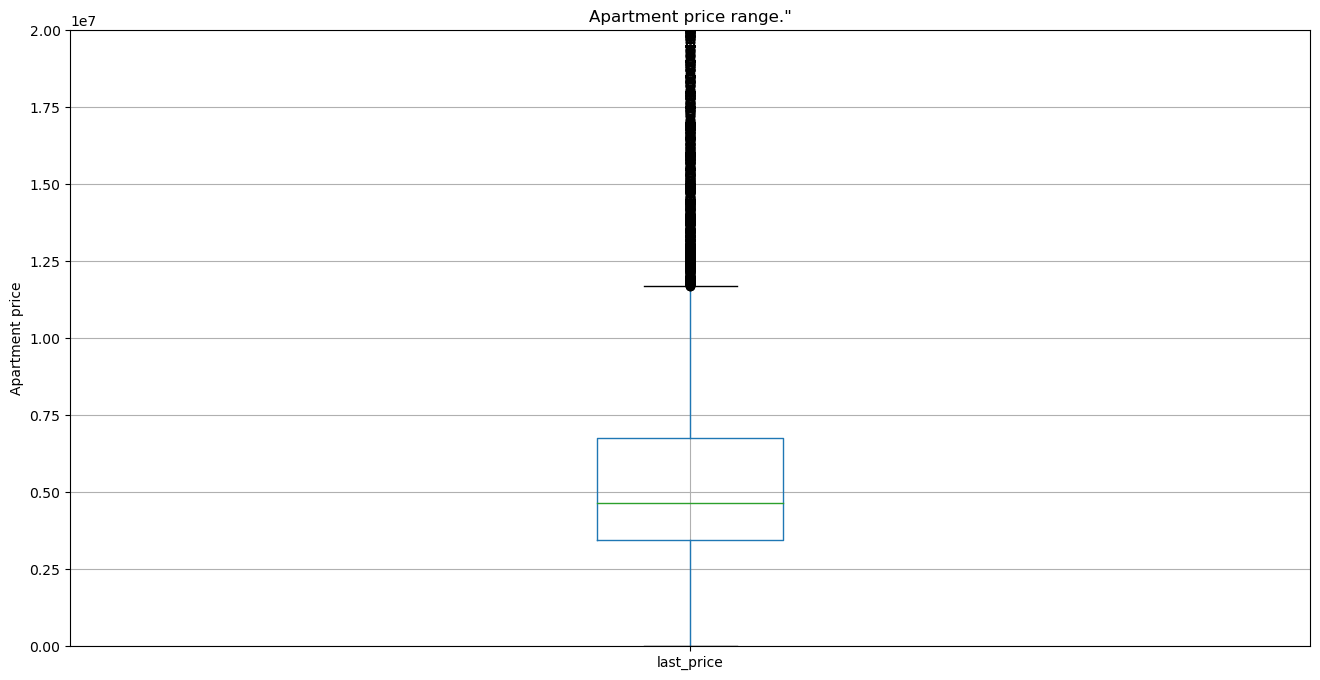

In [23]:
data.boxplot(column=['last_price'], figsize=(16, 8)) # building boxplot 
plt.title('Apartment price range."')
plt.ylim(0, 2e+7)
plt.ylabel('Apartment price')
plt.show()

From the last chart, it can be seen that apartments priced above 12 million rubles are also isolated cases and can be removed

In [24]:
# To exclude apartments with a price less than 300,000 rubles from the list
data.drop(index=data.query('(last_price < 300000)  and (last_price > 1.2e+8)').index,inplace=True) 


#### 2.4.2. Analysis the data in the column 'the total_area'', which Indicates that the Minimum Total Area is 12 sq. m and the Maximum is 900 sq. m.

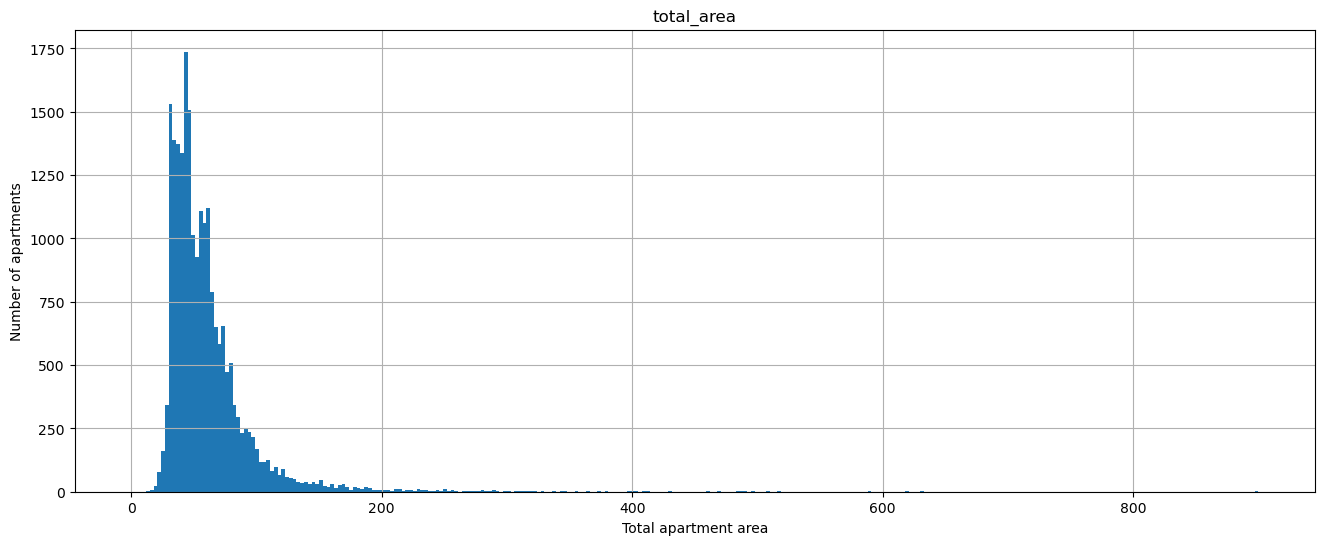

In [25]:
data.hist('total_area', bins = 300, range=(0, 900), figsize=(16, 6))# Building a histogram with the total area value
plt.grid=True                                                             
plt.xlabel('Total apartment area')
plt.ylabel('Number of apartments')
plt.show()       

On the constructed graph, outliers are not noticeable; however, there are minimal and maximal values, each occurring in a negligible quantity (3 and 17, respectively), so it's permissible to remove them.

In [26]:
print('Apartments with an area of less than 15 sq. m.:',data.query('total_area < 15')['total_area'].count()) 
print('Apartments with an area of more than 400 sq. m.:',data.query('total_area > 400')['total_area'].count())

Apartments with an area of less than 15 sq. m.: 3
Apartments with an area of more than 400 sq. m.: 17


In [27]:
data = data.drop(data[(data.total_area < 15)].index)
# Exclude apartments with an area less than 15 sq. m and more than 400 sq. m from the list
data = data.drop(data[(data.total_area > 400)].index) 
data.reset_index()
print('Apartments with an area of less than 15 sq. m.:',data.query('total_area < 15')['total_area'].count()) 
print('Apartments with an area of more than 400 sq. m.:',data.query('total_area > 400')['total_area'].count())


Apartments with an area of less than 15 sq. m.: 0
Apartments with an area of more than 400 sq. m.: 0


#### 2.4.3. Analysis the data in the column 'rooms' 

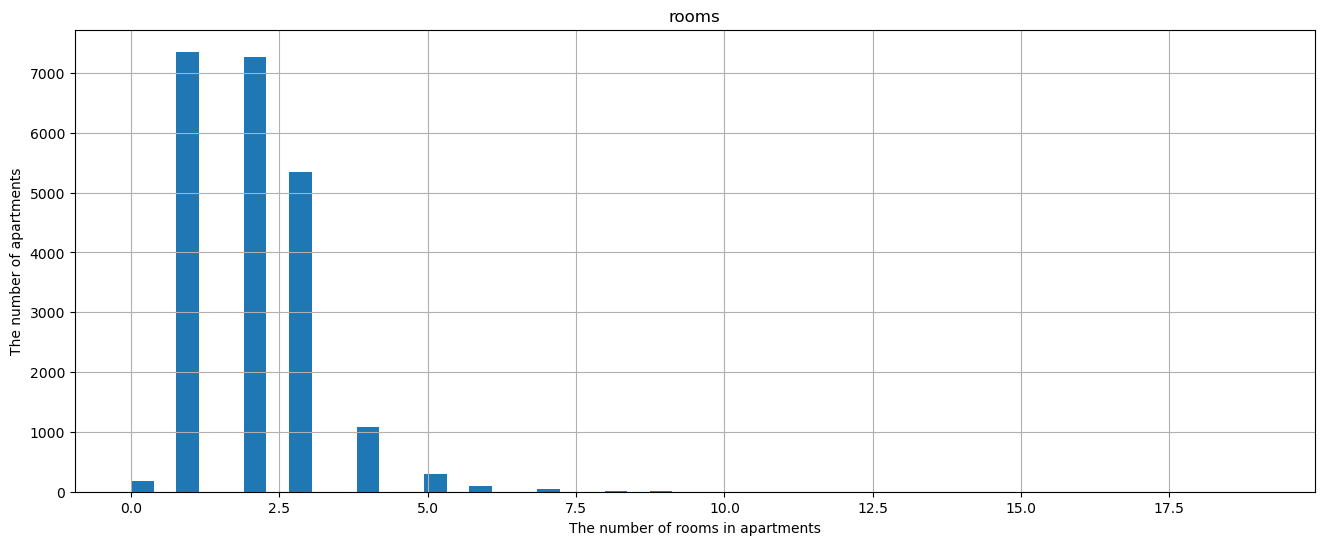

In [28]:
data.hist('rooms', bins = 50, range=(0, 19), figsize=(16, 6))# Creating a histogram with the number of rooms in apartments
plt.grid=True                                                             
plt.xlabel('The number of rooms in apartments')
plt.ylabel('The number of apartments')
plt.show()  

On the graph, outliers are not evident; however, there are apartments with zero room count. These could be studios or apartments with an 'open plan' layout.

In [29]:
# the number of all apartments for which it is indicated that there are zero rooms
print(data.query('rooms == 0')['rooms'].count()) 
# the number of apartments with open floor plans and zero bedrooms
print(data.query('rooms == 0 and open_plan == True')['rooms'].count()) 

183
55


The total number of apartments with zero bedrooms is 183, among which there are 55 apartments with an open floor plan. These should be kept, while the others should be deleted

In [30]:
data = data.drop(data[(data.rooms == 0) & (data.open_plan == False) ].index)


#### 2.4.4. Analysis the data in the column 'ceiling_height' 

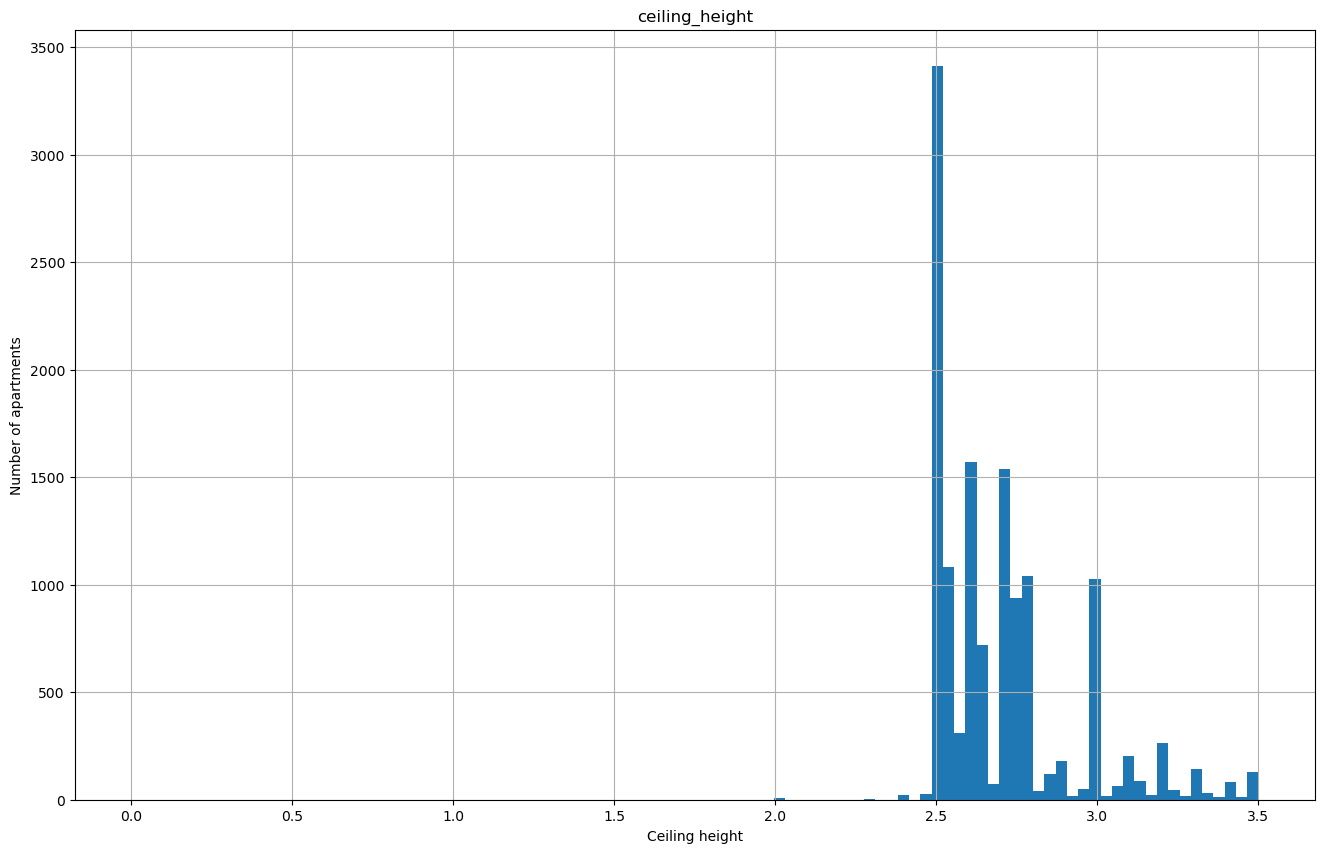

In [31]:
# Building a histogram with the ceiling height values of apartments
data.hist('ceiling_height', bins = 100, range=(0, 3.5), figsize=(16, 10))
plt.grid=True                                                             
plt.xlabel('Ceiling height')
plt.ylabel('Number of apartments')
plt.show() 

On the graph, apartments with a ceiling height less than 2.4 meters are depicted, which does not comply with Russian construction norms. Therefore, such apartments may be removed. Additionally, it is essential to determine if there are apartments with unrealistically high ceiling heights for apartments and their quantity, especially considering that the maximum ceiling height is known to be 100 meters.

In [32]:
print('The number of apartments with a ceiling height greater than 3.5 meters: ',data.query('ceiling_height > 3.5')['ceiling_height'].count()) 


The number of apartments with a ceiling height greater than 3.5 meters:  279


Taking into account that the number of such apartments is insignificant in the total count of missing values, we will remove them from the list.

In [33]:
# Excluding apartments from the data with ceiling height greater than 3.5 meters and less than 2.4 meters
data = data.drop(data[(data.ceiling_height > 3.5)].index)
data = data.drop(data[(data.ceiling_height < 2.4)].index) 
data.reset_index().head(5)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,1,7,3350000,40,2018-12-04,1,NaN,11.0,18.6,1,...,11.0,2,поселок Шушары,12817.0,18603.0,0,0,0,0,81.0
2,2,10,5196000,56,2015-08-20,2,NaN,5.0,34.3,4,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
4,5,10,2890000,30,2018-09-10,1,NaN,12.0,14.4,5,...,9.1,0,поселок городского типа Янино-1,0,NaN,0,0,0,0,55.0


#### 2.4.5. Analysis the data in the column 'floors_total' , where the maximum number of floors in a building is indicated as 60

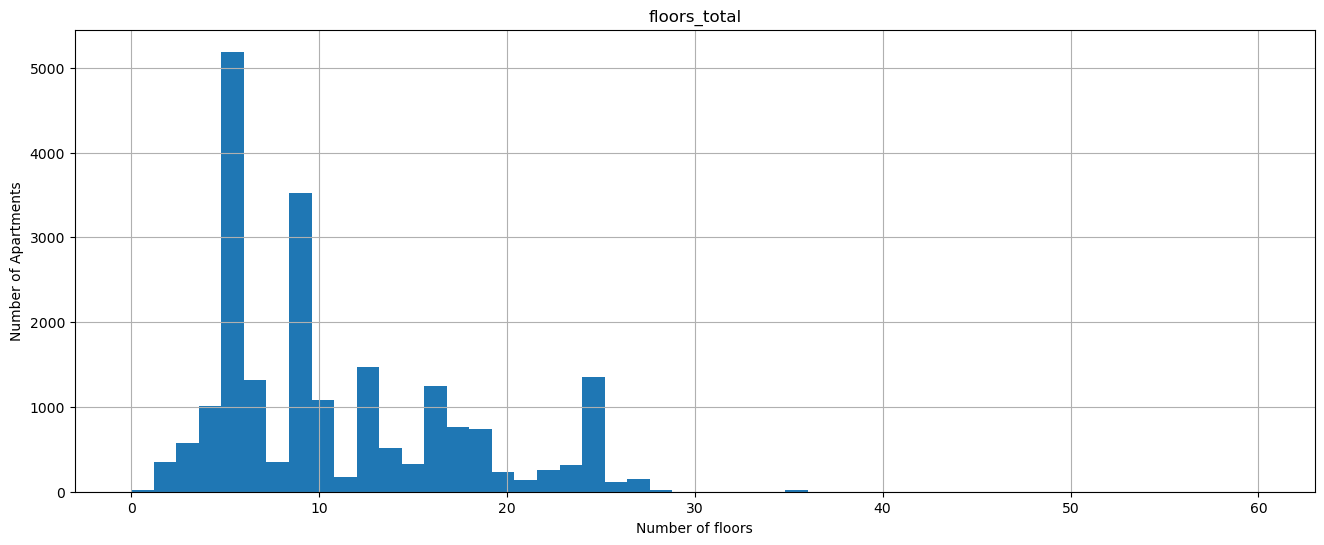

In [34]:
data.hist('floors_total', bins = 50, range=(0, 60), figsize=(16, 6))#Building a histogram with the number of floors
plt.grid=True                                                             
plt.xlabel('Number of floors')
plt.ylabel('Number of Apartments')
plt.show() 

On the graph, it can be inferred that the number of houses with one floor is insignificant, as well as houses with more than 30 floors. Before their removal, I will conduct a preliminary check of these assumptions.

In [35]:
print('Number of apartments in buildings with one floor: ',data.query('floors_total ==1')['floors_total'].count())
print('The number of apartments in buildings with the number of floors from 30 to 40: ',data.query('30 <= floors_total < 40')['floors_total'].count()) 
print('The number of apartments in buildings with the number of floors from 40 to 50: ',data.query('40 <= floors_total < 50')['floors_total'].count()) 
print('The number of apartments in buildings with the number of floors from 50 to 60: ',data.query('50 <= floors_total <= 60')['floors_total'].count()) 


Number of apartments in buildings with one floor:  19
The number of apartments in buildings with the number of floors from 30 to 40:  26
The number of apartments in buildings with the number of floors from 40 to 50:  0
The number of apartments in buildings with the number of floors from 50 to 60:  2


In [36]:
# Excluding apartments with the number of floors 1 and more than 30

data = data.drop(data[(data.floors_total >= 30)].index)
data = data.drop(data[(data.floors_total == 1)].index)
data.reset_index().head(5)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,1,7,3350000,40,2018-12-04,1,NaN,11.0,18.6,1,...,11.0,2,поселок Шушары,12817.0,18603.0,0,0,0,0,81.0
2,2,10,5196000,56,2015-08-20,2,NaN,5.0,34.3,4,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
4,5,10,2890000,30,2018-09-10,1,NaN,12.0,14.4,5,...,9.1,0,поселок городского типа Янино-1,0,NaN,0,0,0,0,55.0


#### 2.4.6. Analysis the data in the column 'living_area'

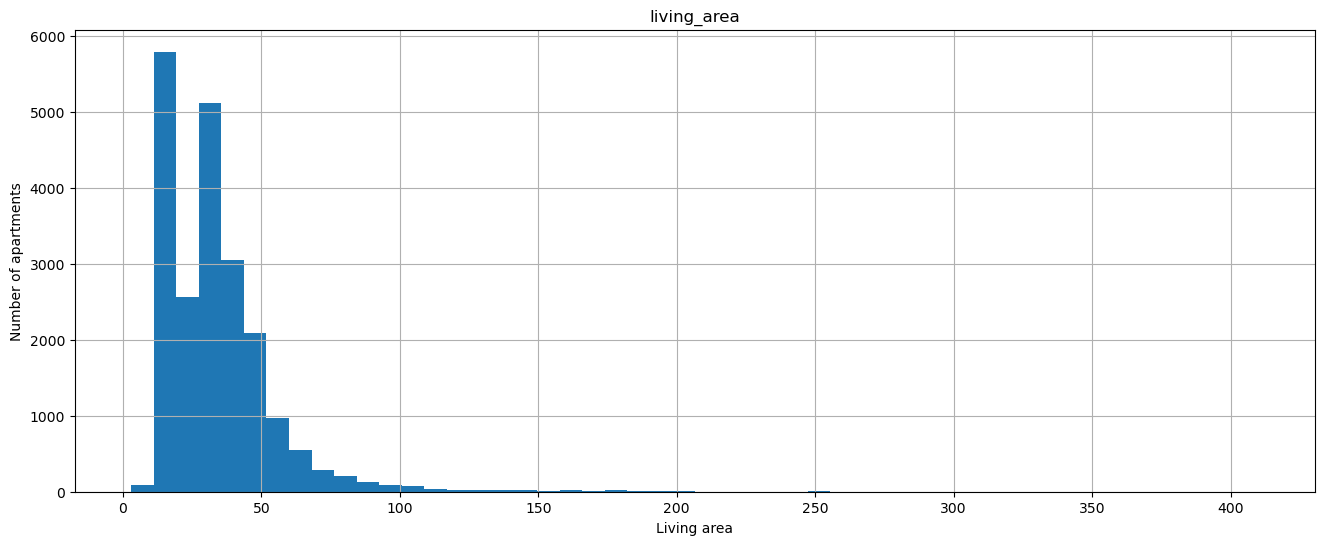

In [37]:
data.hist('living_area', bins = 50, range=(3, 410), figsize=(16, 6))#Building a histogram of living area in apartments
plt.grid=True                                                             
plt.xlabel('Living area')
plt.ylabel('Number of apartments')
plt.show() 

On the graph, apartments with a living area of less than 10 square meters per person are depicted, which is below the current construction norms. Therefore, these apartments may be removed from the list. It makes sense to determine how many apartments have a living area greater than 200 square meters.

In [38]:
print('The number of apartments with a living area less than 10 sq.m: ',data.query('living_area < 10')['living_area'].count()) 
print('The number of apartments with a living area more than 200 sq.m: ',data.query('living_area > 200')['living_area'].count()) 


The number of apartments with a living area less than 10 sq.m:  23
The number of apartments with a living area more than 200 sq.m:  9


Since the number of those appartments is insignificant, I will delete them.

In [39]:
#  Exclusion of apartments with a living area less than 10 sq. m and more than 200 sq.m
data = data.drop(data[(data.living_area < 10)].index)
data = data.drop(data[(data.living_area > 200)].index)
data.reset_index().head(5)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,1,7,3350000,40,2018-12-04,1,NaN,11.0,18.6,1,...,11.0,2,поселок Шушары,12817.0,18603.0,0,0,0,0,81.0
2,2,10,5196000,56,2015-08-20,2,NaN,5.0,34.3,4,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
4,5,10,2890000,30,2018-09-10,1,NaN,12.0,14.4,5,...,9.1,0,поселок городского типа Янино-1,0,NaN,0,0,0,0,55.0


In [40]:
# Check for explicit duplicates
print('Number of explicit duplicates:', data.duplicated().sum())

Number of explicit duplicates: 0


In [41]:
#### 2.4.7. Intermediate Conclusion After Preliminary Data Processing

At this stage of the project, analysis of the data was conducted to identify rare and outlier values with the intention of removing them.

As a result, the following values were removed:

1) In the **last_price** column, apartments with prices less than 300,000 rubles and greater than 12 million rubles were removed.

2) In the **living_area** column, apartments with areas less than 10 sq. m per person (which is below current construction norms) and apartments with areas greater than 200 sq. m were removed.

3) In the **rooms** column, apartments with the maximum number of rooms (19) were removed. Additionally, apartments with zero rooms were removed if they were studios or open plan layouts.

4) In the **ceiling_height** column, apartments with ceiling heights less than 2.4 meters (which do not comply with Russian construction norms) and apartments with unrealistically high ceiling heights (above 3.5 meters) were removed.

5) In the **floors_total** column, apartments with a total number of floors less than 30 were removed due to their low count.

6) In the **city_centers_nearest** column, a significant number of missing values were retained, which should not be removed as it would result in a substantial data loss. However, it should be noted for further analysis that these are missing values and not outliers. The same applies to the **airports_nearest** column.

#### 2.4.8. Adding New Columns to the Table

In [42]:
data['last_price_kv_m'] = round(data['last_price']/data['total_area'], 2)  # price per square meter;

data['day_of_week'] = data['first_day_exposition'].dt.weekday # day of the week of the ad publication;

data['day_of_month'] = data['first_day_exposition'].dt.day # day of the month of the ad publication;

data['month'] = data['first_day_exposition'].dt.month_name() # month of the ad publication;

data['year'] = data['first_day_exposition'].dt.year # year of the ad publication;

def floor(index): # function to determine the floor type
    if (index['floor'] == 1):
        return 'первый'
    if (index['floors_total'] == index['floor']):
        return 'последний'
    return 'другой'
data['type_floor'] = data.apply(floor, axis=1) # the floor type​ («первый», «последний», «другой»);


data['city_centers_nearest'] = data['city_centers_nearest'].fillna(value=0)
data['city_centers_nearest']= round(data['city_centers_nearest'] / 1000, 0) 
data['city_centers_nearest'] = data['city_centers_nearest'].astype('int64') #Distance to the city center in kilometers 
                                                                            #(convert from meters to kilometers and round to whole values)

data['kitchen_area'] = data['kitchen_area'].astype('int64') 
data['floors_total'] = data['floors_total'].astype('int64')
data['airports_nearest'] = data['airports_nearest'].astype('int64')
data['parks_nearest'] = data['parks_nearest'].astype('int64')

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_kv_m,day_of_week,day_of_month,month,year,type_floor
0,20,13000000,108,2019-03-07,3,2.70,16,51.0,8,False,...,482,2,755.0,NaN,120370.37,3,7,March,2019,другой
1,7,3350000,40,2018-12-04,1,NaN,11,18.6,1,False,...,0,0,0,81.0,83750.00,1,4,December,2018,первый
2,10,5196000,56,2015-08-20,2,NaN,5,34.3,4,False,...,90,2,574.0,558.0,92785.71,3,20,August,2015,другой
4,2,10000000,100,2018-06-19,2,3.03,14,32.0,13,False,...,112,1,48.0,121.0,100000.00,1,19,June,2018,другой
5,10,2890000,30,2018-09-10,1,NaN,12,14.4,5,False,...,0,0,0,55.0,96333.33,0,10,September,2018,другой


### 3. "Exploratory Data Analysis" (EDA)"

#### 3.1. Studying Object Parameters

In [43]:
data_analysis = data.reindex(columns=['total_area', 'living_area', 'kitchen_area', 'last_price',
              'rooms', 'ceiling_height', 'floor', 'type_floor', 'floors_total', 
              'city_centers_nearest', 'airports_nearest', 'parks_nearest', 'day_of_week', 'month'])
 
data_analysis.head(5)                


,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,type_floor,floors_total,city_centers_nearest,airports_nearest,parks_nearest,day_of_week,month
0,108,51.0,25,13000000,3,2.70,8,другой,16,16,18863,482,3,March
1,40,18.6,11,3350000,1,NaN,1,первый,11,19,12817,0,1,December
2,56,34.3,8,5196000,2,NaN,4,другой,5,14,21741,90,3,August
4,100,32.0,41,10000000,2,3.03,13,другой,14,8,31856,112,1,June
5,30,14.4,9,2890000,1,NaN,5,другой,12,0,0,0,0,September


In [44]:
# Using method for providing various statistics for each numeric column. It allows you to identify potential outliers, 
# understand the range of values, and assess the overall shape of the data.
data_analysis.describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,city_centers_nearest,airports_nearest,parks_nearest,day_of_week
count,21176.000000,21176.000000,21176.000000,2.117600e+04,21176.000000,13268.000000,21176.000000,21176.000000,21176.000000,21176.000000,21176.000000,21176.000000
mean,58.878495,33.846248,9.824329,6.191353e+06,2.063751,2.703721,5.880100,10.653853,11.108897,22299.468266,166.988619,2.550434
std,30.236315,19.434865,5.716640,7.405487e+06,1.032230,0.222193,4.827629,6.480722,9.680358,16463.582883,305.639527,1.784071
min,16.000000,10.000000,0.000000,1.219000e+04,0.000000,2.400000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,18.600000,7.000000,3.450000e+06,1.000000,2.500000,2.000000,5.000000,3.000000,10663.000000,0.000000,1.000000
50%,52.000000,30.000000,9.000000,4.630000e+06,2.000000,2.650000,4.000000,9.000000,11.000000,21928.000000,0.000000,2.000000
75%,69.000000,42.000000,11.000000,6.698250e+06,3.000000,2.800000,8.000000,16.000000,15.000000,34707.000000,302.000000,4.000000
max,398.000000,200.000000,107.000000,3.300000e+08,16.000000,3.500000,27.000000,29.000000,66.000000,84869.000000,3190.000000,6.000000


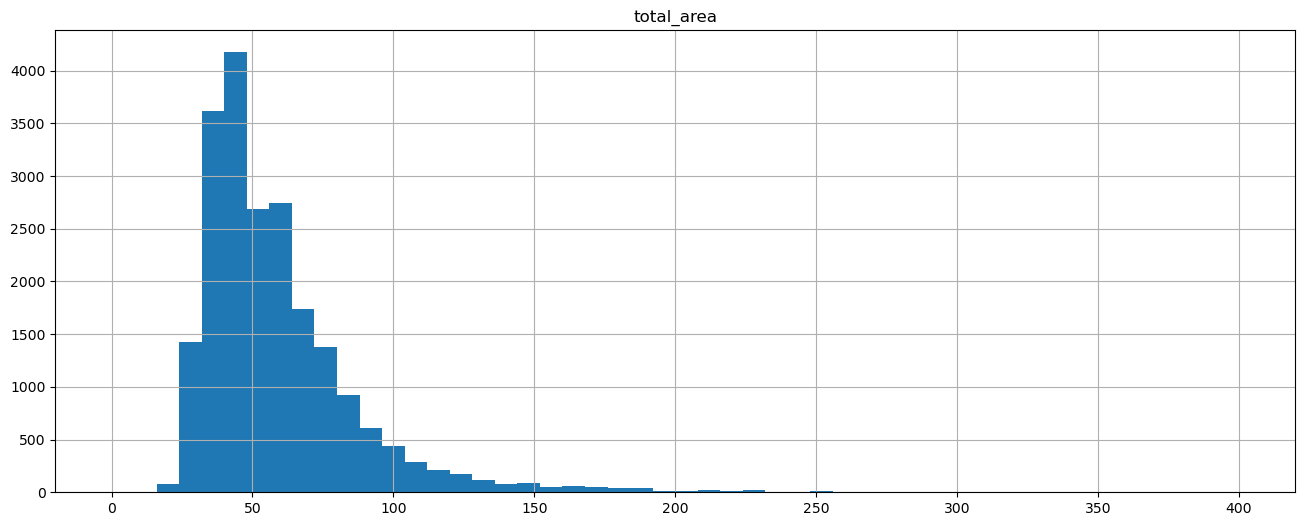

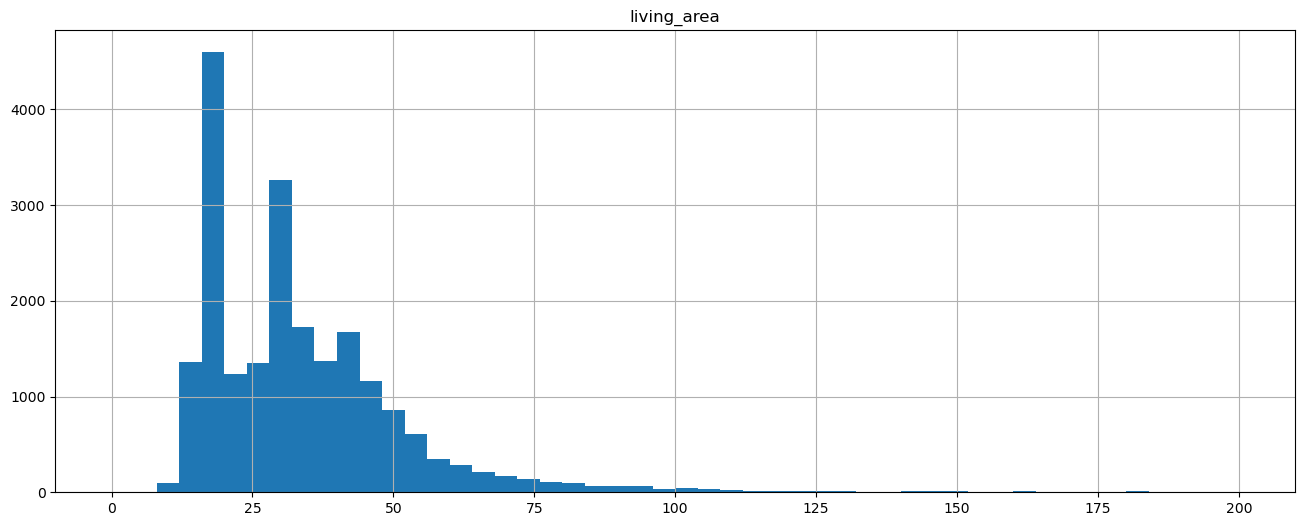

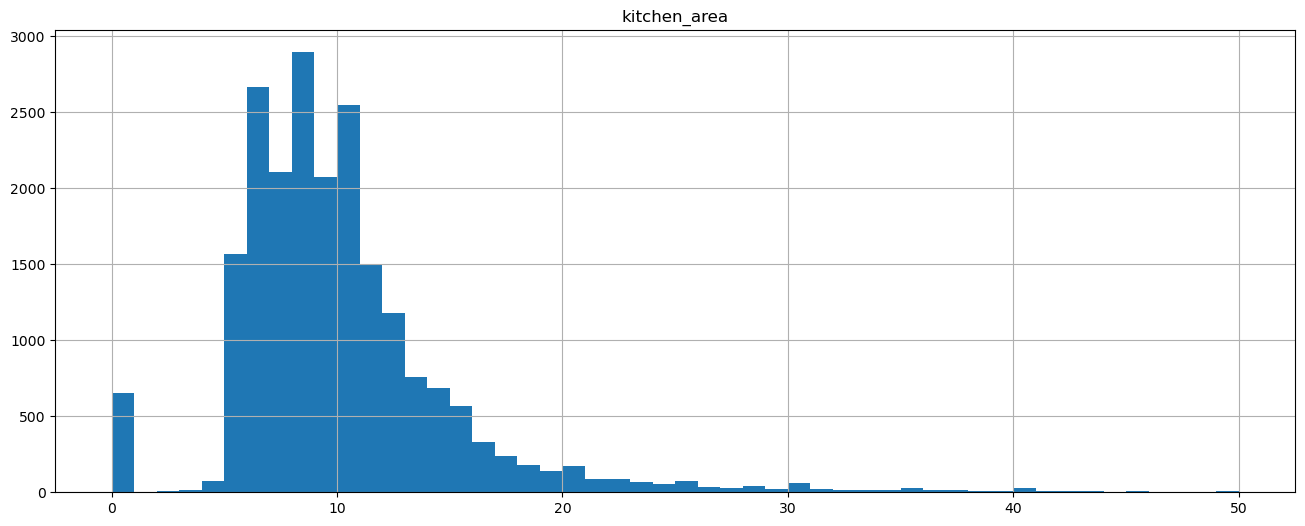

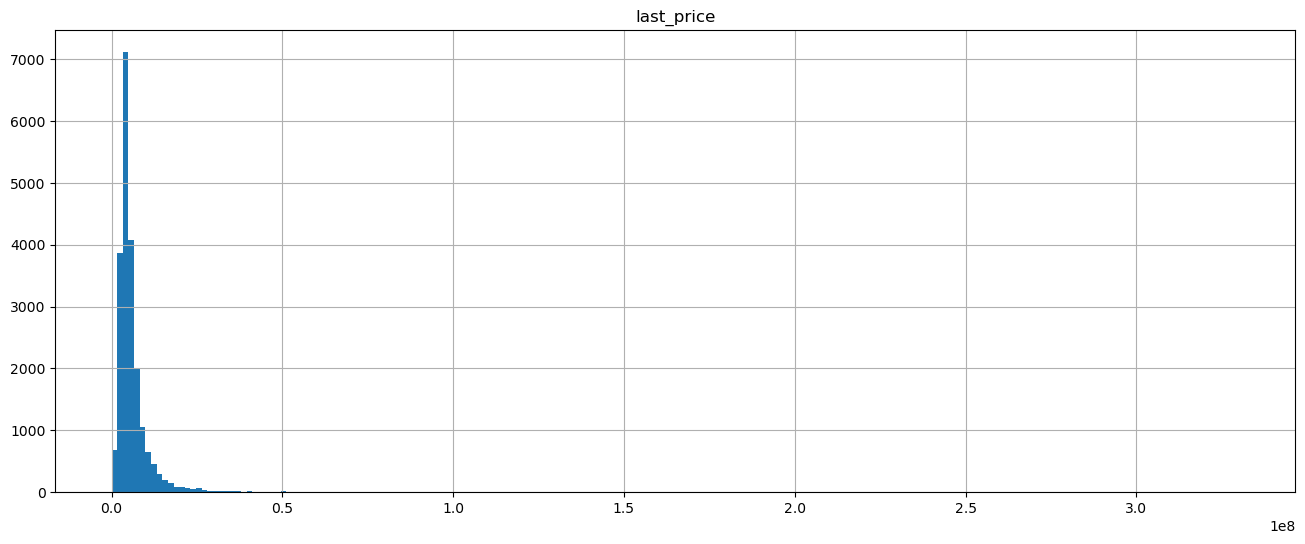

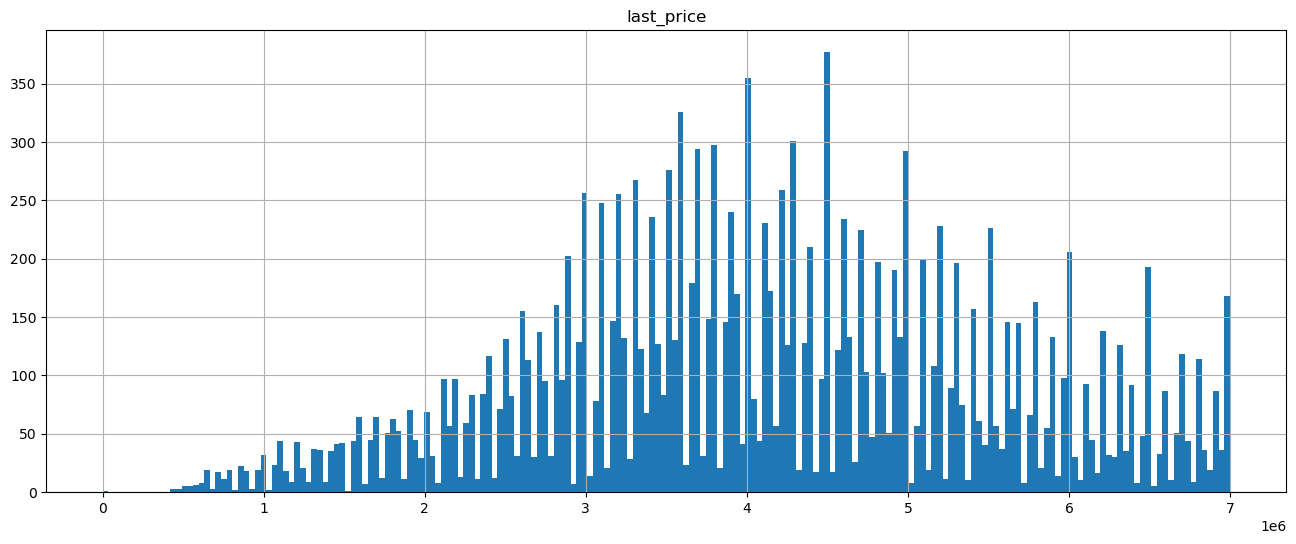

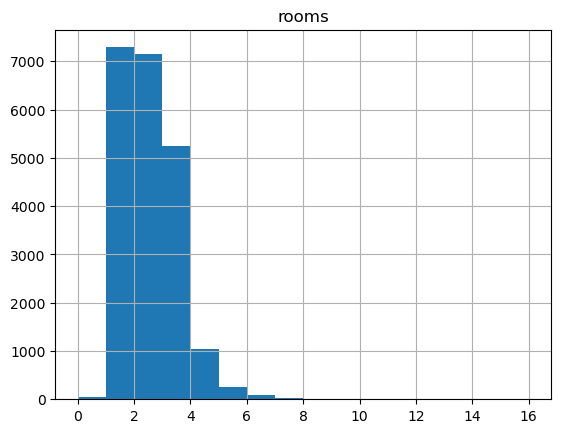

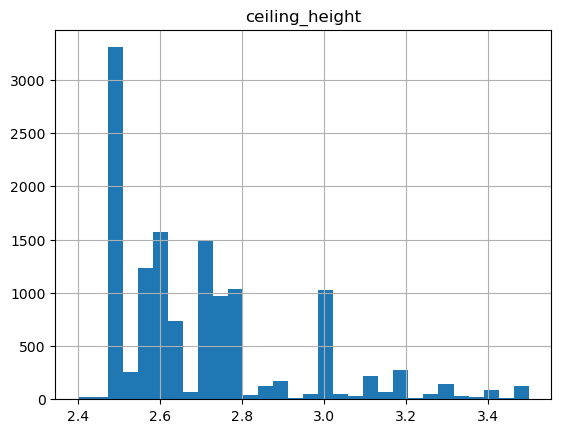

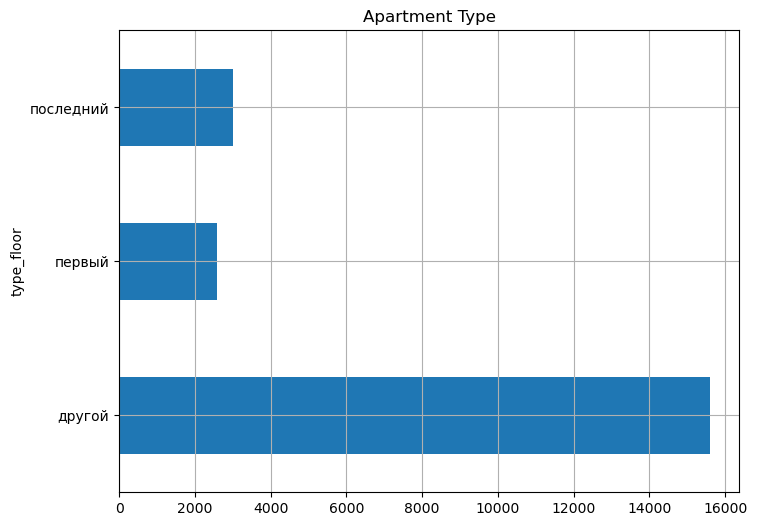

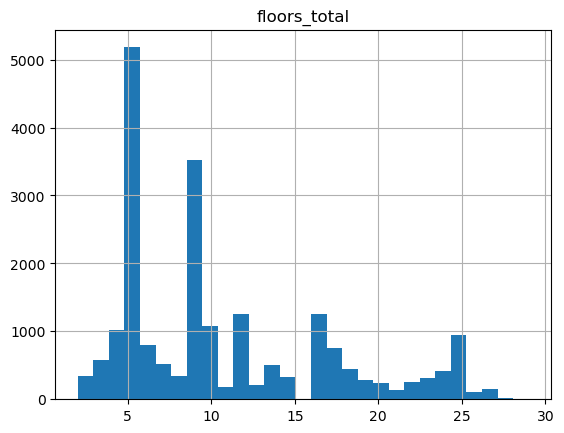

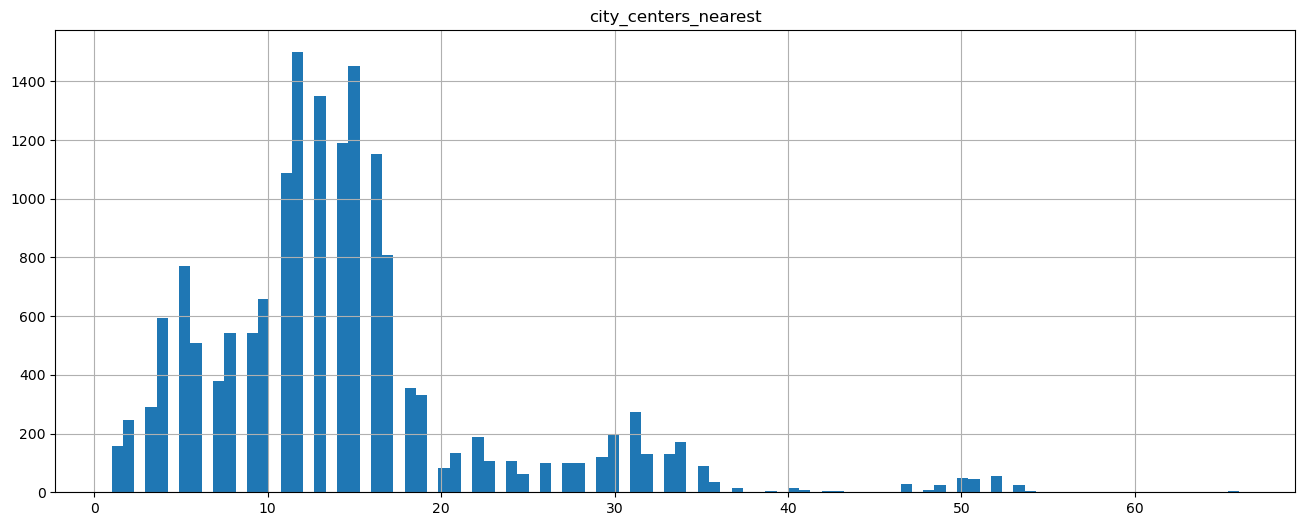

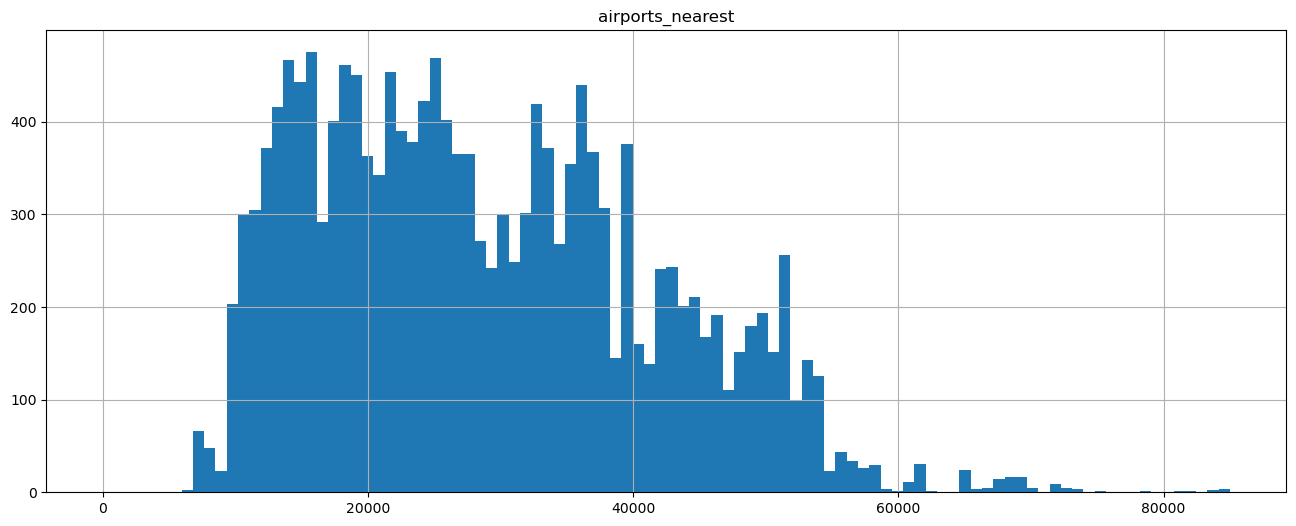

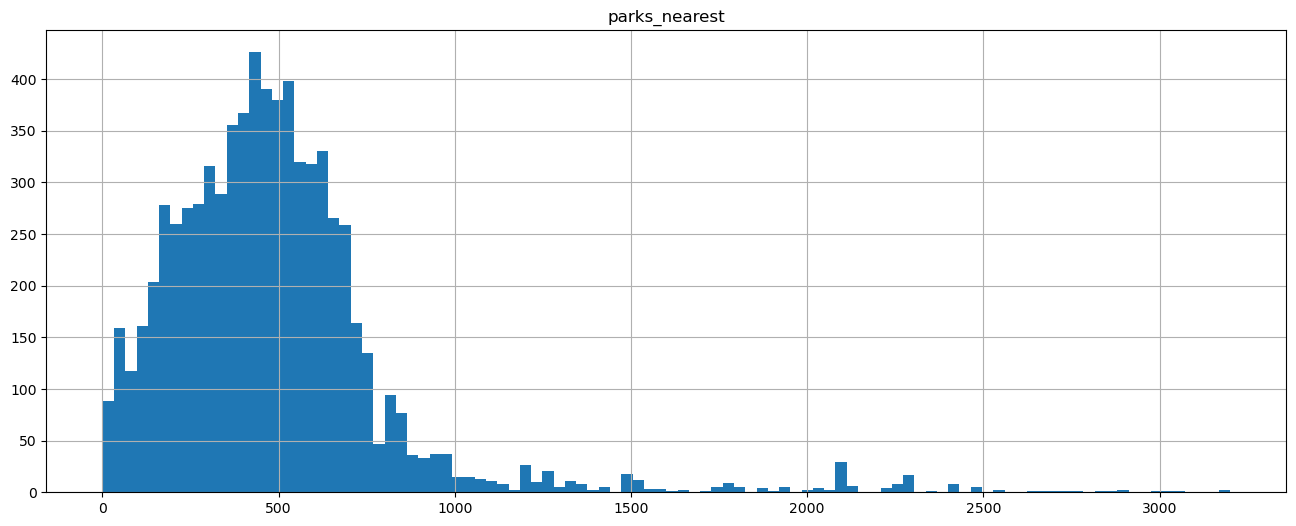

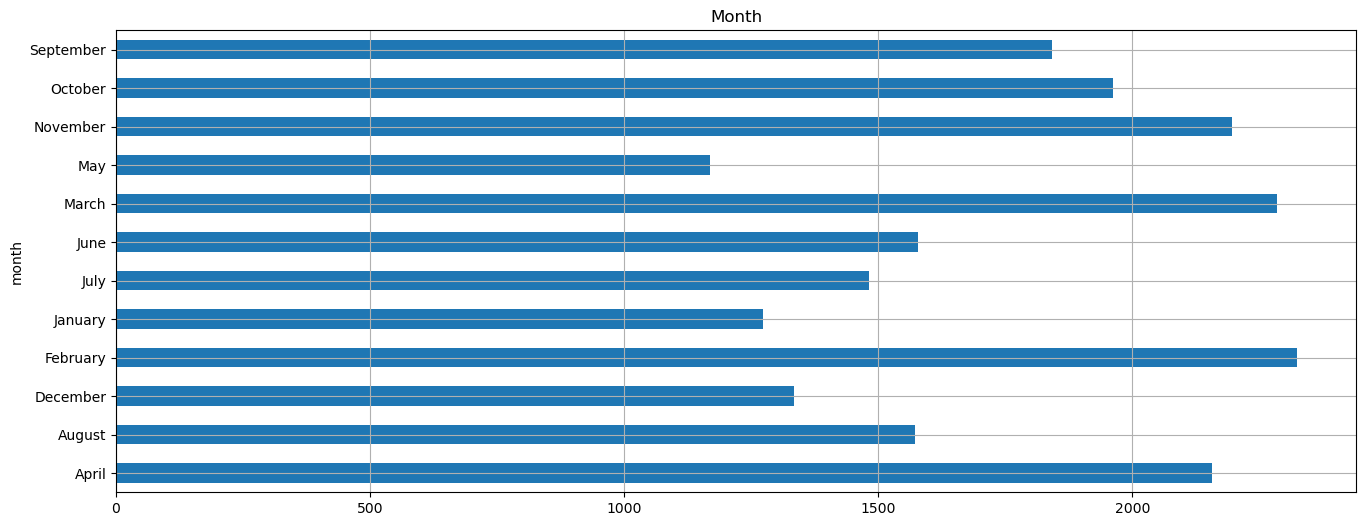

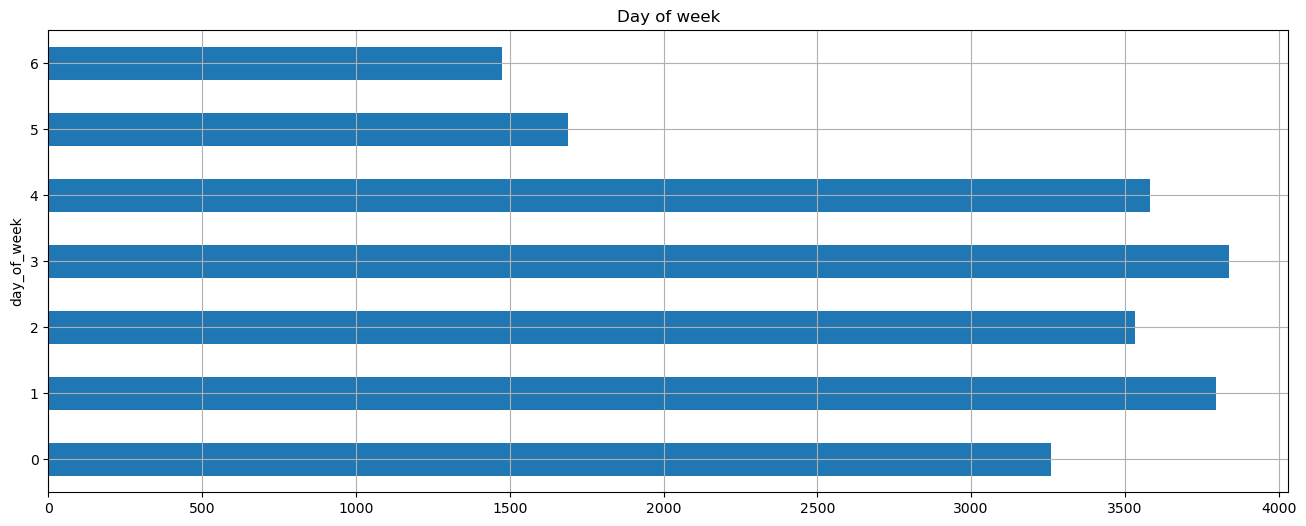

In [45]:
# Building gistogramms for each numeric column 
data_analysis.hist('total_area', bins=50, range=(0,400), figsize=(16, 6))

data_analysis.hist('living_area', bins=50, range=(0,200), figsize=(16, 6))

data_analysis.hist('kitchen_area', bins=50, range=(0,50), figsize=(16, 6))

data_analysis.hist('last_price', bins=200, range=(0,3.3e+08), figsize=(16, 6))

data_analysis.hist('last_price', bins=200, range=(0,7e+06), figsize=(16, 6))

data_analysis.hist('rooms', bins=data_analysis['rooms'].max())

data_analysis.hist('ceiling_height', bins=30)

data_analysis.hist('floor', bins=data_analysis['floor'].max())

data_analysis.groupby('type_floor')['type_floor'].count().plot(kind = 'barh', 
    figsize=(8,6), title = 'Apartment Type', grid='True')
plt.show()
 
data_analysis.hist('floors_total', bins=data_analysis['floors_total'].max()) 

data_analysis.hist('city_centers_nearest', bins=100, range=(1,66), figsize=(16, 6))

data_analysis.hist('airports_nearest', bins=100, range=(1,85000), figsize=(16, 6))

data_analysis.hist('parks_nearest', bins=100, range=(1,3200), figsize=(16, 6))
plt.show()


data_analysis.groupby('month')['month'].count().plot(kind = 'barh', 
    figsize=(16,6), title = 'Month', grid='True')
plt.show()

data_analysis.groupby('day_of_week')['day_of_week'].count().plot(kind = 'barh', 
    figsize=(16,6), title = 'Day of week', grid='True')
plt.show()



**The constructed histograms allow to draw the following conclusions:**

1) The `total area` histogram shows that the majority of apartment sizes fall within the range of 25 sq.m to 75 sq.m. The highest number of apartments have an area between 40 to 50 sq.m. Apartments with a total area exceeding 150 sq.m. are considered elite real estate, and their quantity is insignificant in the overall dataset.

2) The `living area` histogram follows a similar pattern to the "total area" histogram, but here we can clearly see two peaks. The first peak corresponds to apartments with a living area of 15-20 sq.m., indicating small-sized apartments, while the second peak is for apartments with an area of 30-35 sq.m., which represents apartments of average size.

3) The `kitchen area` histogram shows that most of the apartments for sale have kitchen areas ranging from 5 to 14 sq.m. Among them, kitchen areas of 7.9 sq.m. and 11 sq.m. are the most common. As the kitchen area increases, the number of listings decreases.

4) The first `price` histogram indicates that the majority of listings fall within the mid-price range, and the second `price` histogram confirms this. The most common offers are in the price range of 3 to 5.5 million rubles.

5) The `number of rooms` histogram reveals that the most common listings are for one- and two-room apartments, with three-room apartments coming in third. Other types of apartments are less frequently listed.

6) The `ceiling height` histogram confirms that ceiling height is a highly standardized feature in apartment layouts. It shows distinct and common values such as 2.5m, 2.6m, 2.7m, and 3.0m. Apartments with a ceiling height of 2.5m are the clear leaders in terms of sales.

7) The `floor` histogram reveals that most apartments for sale are located on floors 2 to 6. The number of listings significantly decreases for higher floors.

8) The `type of floor (‘first’, ‘last’, ‘other’)` histogram shows that most apartments for sale are not on the first or last floors, which is expected since there are physically fewer of them. The number of apartments on the first and last floors does not significantly differ.

9) The `total number of floors in the building` histogram demonstrates three peaks, corresponding to apartments in five-story buildings (over 5000 listings), followed by apartments in nine-story buildings (over 3000 listings). The third place is shared by apartments in 12-story, 16-story, and 25-story buildings. Overall, the histogram reflects the structure of the housing stock in St. Petersburg and its surroundings.

10) The `distance to the city center` histogram in meters shows that the majority of apartments are located within the range of 11 to 17 km from the city center.

11) The `distance to the nearest airport` histogram demonstrates that a significant number of apartments are within the range of 10 to 40 km from the nearest airport.

12) The `distance to the nearest park` histogram confirms that there are many parks in St. Petersburg and the surrounding areas, often within walking distance.

13) The histograms for `day and month of listing publication` show that the highest number of apartment listings occurs in November, December, and February, while business activity decreases by May. As for the days of the week, most listings are published on weekdays.

#### 3.2. Analysis of how quickly apartments were sold

The parameter that indicates how quickly apartments were sold is the number of days each listing was displayed.

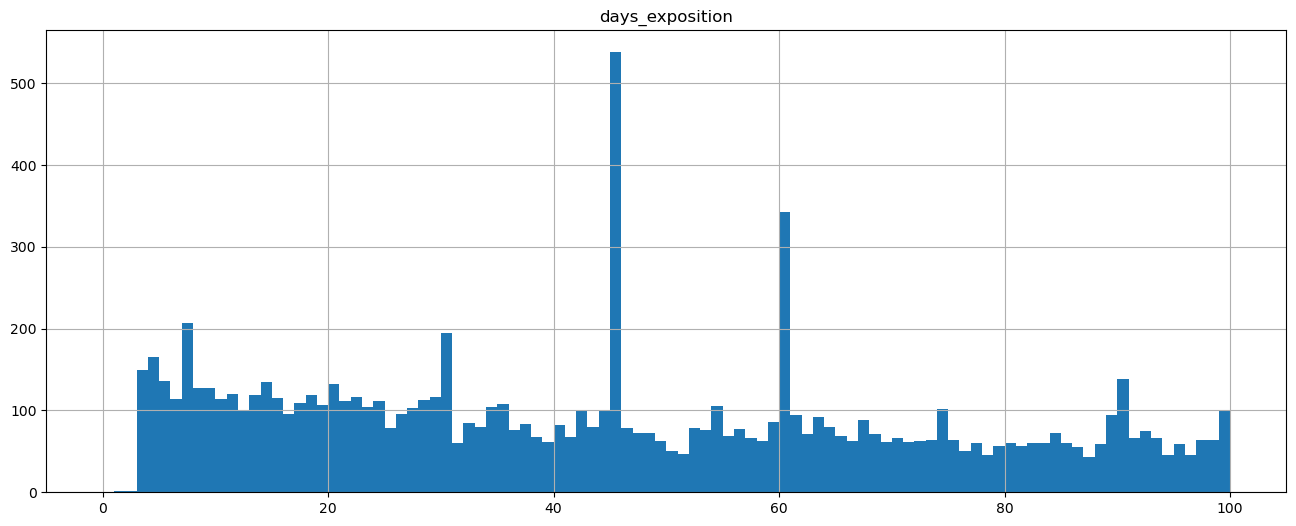

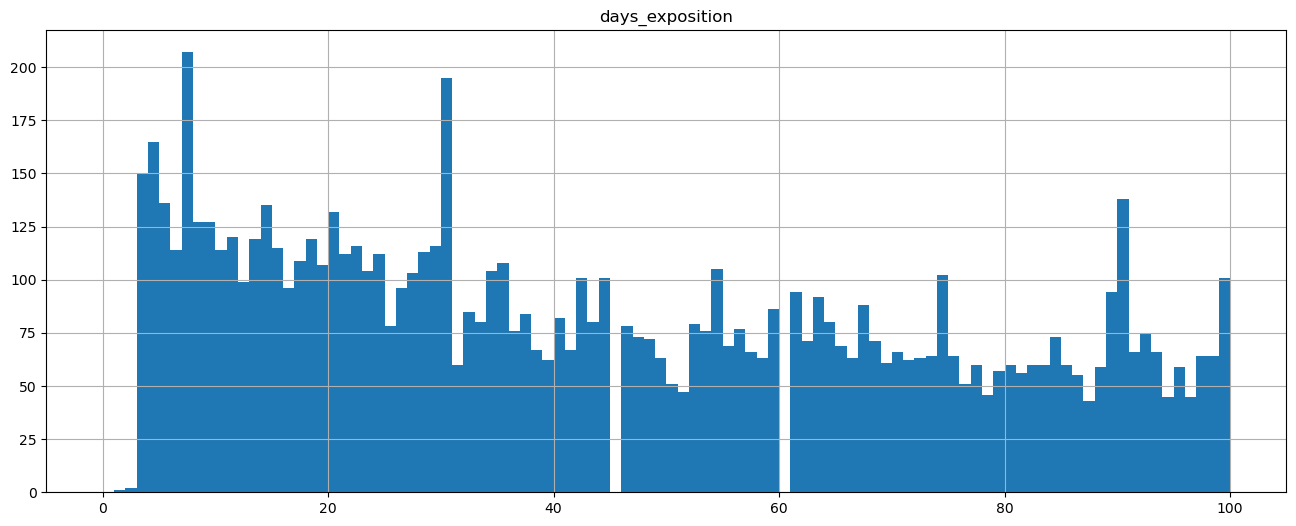

In [46]:
# Building gistogramm

data.hist('days_exposition', bins=100, range=(0,100), figsize=(16, 6))
plt.show()
# Removing Outliers - Exposure 45 Days
data = data.drop(data[(data.days_exposition > 45) & (data.days_exposition < 46)].index)  

# Removing Outliers - Exposure 60 Days
data = data.drop(data[data.days_exposition == 60].index) 
 
data.hist('days_exposition', bins=100, range=(0,100), figsize=(16, 6))
plt.show()

In [47]:
# Average days on market for apartments
data['days_exposition'].mean() 

190.9082505597979

In [48]:
# Median days on market for apartments
data['days_exposition'].median() 

109.0

In [49]:
# Determining quartiles
data['days_exposition'].describe() 

count    17417.000000
mean       190.908251
std        224.370871
min          1.000000
25%         42.000000
50%        109.000000
75%        249.000000
max       1580.000000
Name: days_exposition, dtype: float64

The first quartile means that 25% of the values in the 'days_exposition' column are less than 44 days.
The second quartile means that half of the values in the 'days_exposition' column are less than 101 days.
The third quartile means that 75% of the values in the 'days_exposition' column are less than 237 days.
**Conclusion:**
On average, it takes 101 days to sell an apartment. Sales within 44 days after exposure can be considered quick.
Unusually long sales take more than 237 days.

#### 3.3. Studying the factors that have the greatest impact on the total (full) cost of the property

Building graphs that will show the dependence of price on various parameters.

In [50]:
data_factors = data.reindex(columns=['total_area', 'living_area', 'kitchen_area', 'last_price',
              'rooms', 'type_floor', 'day_of_week', 'month', 'year'])

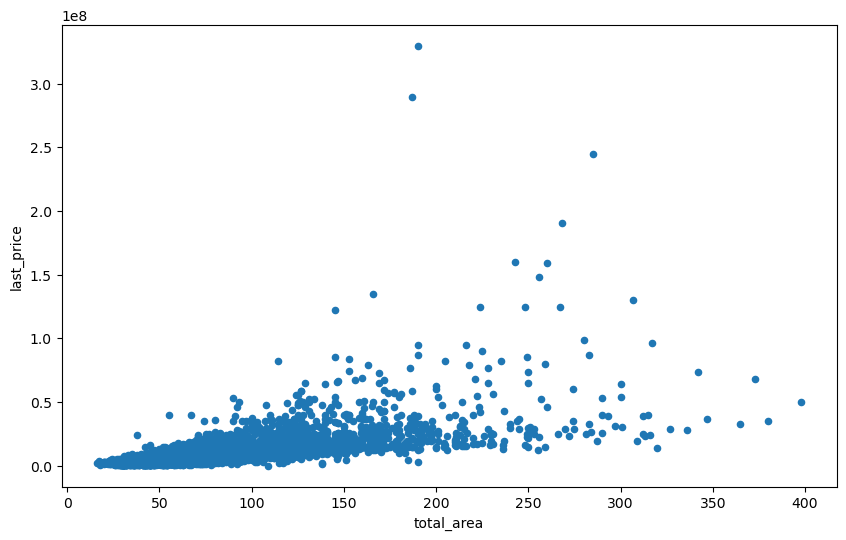

In [51]:
# A graph depicting the relationship between the price and the total area of apartments listed for sale.
data_factors.sort_values(by='last_price').plot(x='total_area',
            y='last_price',
            kind='scatter', figsize=(10, 6))
plt.show()

In [52]:
print('Pearson Correlation Coefficient: ',data_factors['total_area'].corr(data_factors['last_price']))

Pearson Correlation Coefficient:  0.671216178594665


The Pearson correlation coefficient is positive, thus, we can conclude that as the total area increases, the apartment's price also increases.

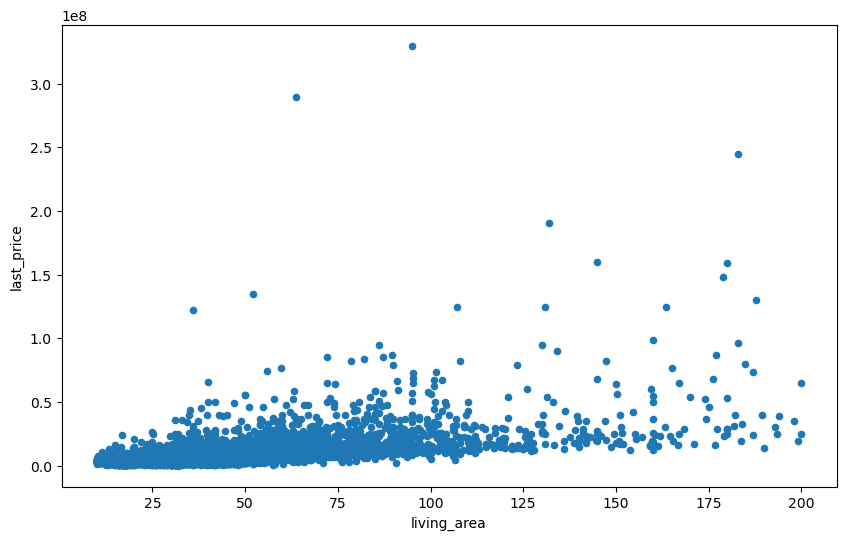

Pearson Correlation Coefficient:  0.5831330125403104


In [53]:
# A graph depicting the relationship between the price and the living area of apartments listed for sale.
data_factors.sort_values(by='last_price').plot(x='living_area',
            y='last_price',
            kind='scatter', figsize=(10, 6))
plt.show()

print('Pearson Correlation Coefficient: ', data_factors['living_area'].corr(data_factors['last_price']))

Pearson Correlation Coefficient is positive, thus, it can be concluded that as the living area increases, the apartment's price also increases, but this relationship is weaker compared to the total area.

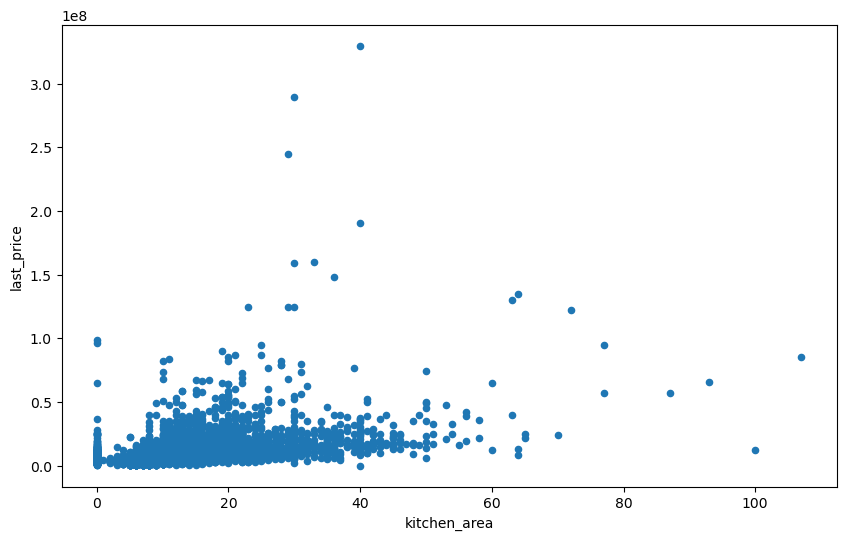

Pearson Correlation Coefficient:  0.49509940573633426


In [54]:
# Graph of the price dependence on kitchen area of apartments listed for sale 
data_factors.sort_values(by='last_price').plot(x='kitchen_area',
            y='last_price',
            kind='scatter', figsize=(10, 6))
plt.show()
print('Pearson Correlation Coefficient: ',data_factors['kitchen_area'].corr(data_factors['last_price']))

The Pearson correlation coefficient is positive, thus indicating that as the kitchen area increases, the apartment's price also tends to increase. However, this correlation is weaker than that of the total apartment area.

The price dependency on the total area, living area, and kitchen area, for the apartments listed for sale, reflects a general trend: an increase in price is related to these parameters, and this is most noticeable in apartments with a total area of less than 125 sq.m. and a living area of less than 75 sq.m. Afterward, this dependency weakens, likely due to the influence of other factors.

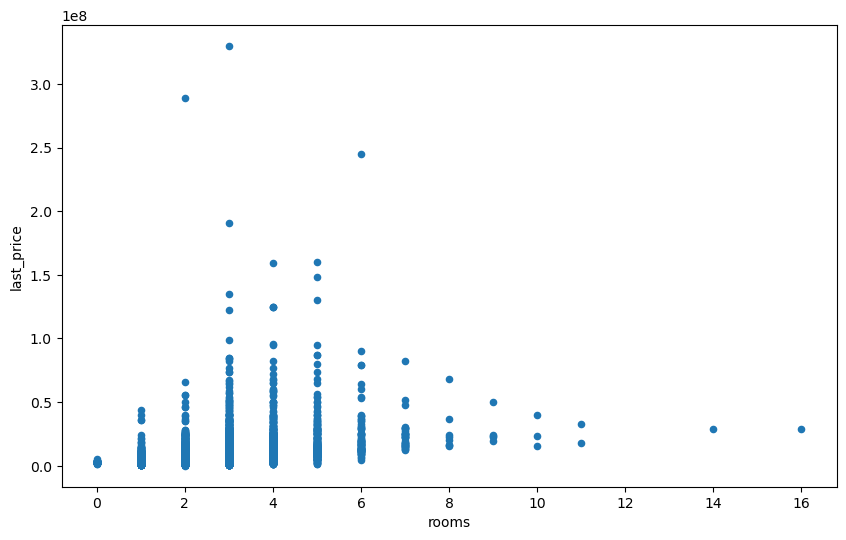

Pearson Correlation Coefficient:  0.3955229440863896


In [55]:
# A graph depicting the relationship between price and the number of rooms in apartments listed for sale
data_factors.sort_values(by='last_price').plot(x='rooms',
            y='last_price',
            kind='scatter', figsize=(10, 6))
plt.show()
print('Pearson Correlation Coefficient: ', data_factors['rooms'].corr(data_factors['last_price']))

The Pearson correlation coefficient is positive, indicating a relationship between the apartment's price and the number of rooms, but it's not strong. Excluding individual outliers, a general trend can be observed: as the number of rooms increases, there is a wider price range. This situation holds true for apartments with five rooms. Then, the situation gradually changes: as the number of rooms increases, the price range for apartments decreases.

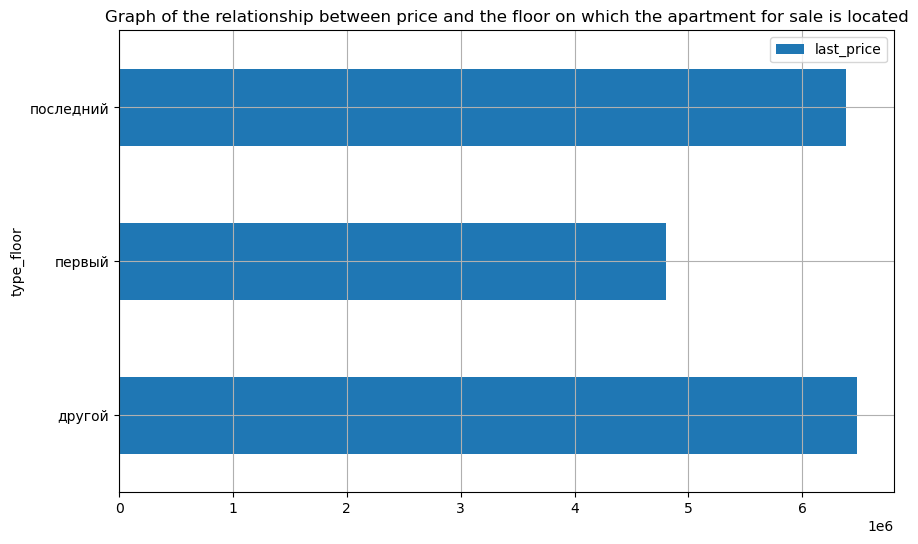

In [56]:
# Graph of the relationship between price and the floor on which the apartment for sale is located
data_factors.pivot_table(index='type_floor',values='last_price').plot(y='last_price', kind='barh', 
figsize=(10,6), title = 'Graph of the relationship between price and the floor on which the apartment for sale is located', grid='True')
plt.show()

From the graph, it can be seen that the level of dependence of the apartment's price on its floor is insignificant and is mainly observed for apartments located on the first floor.

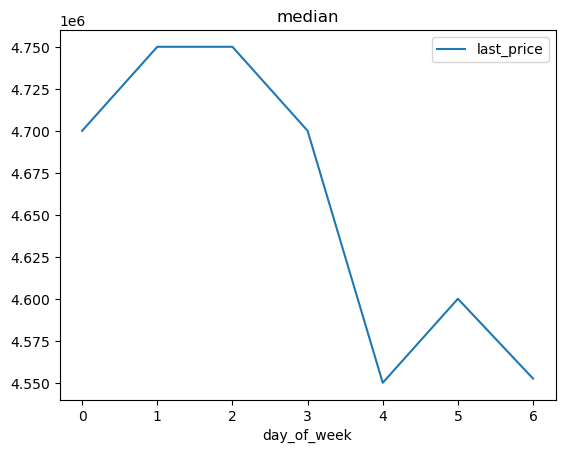

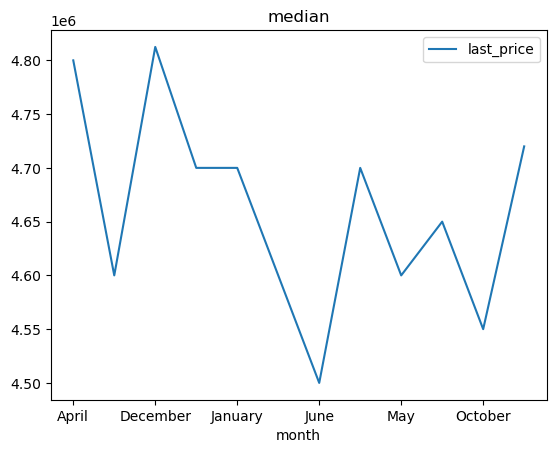

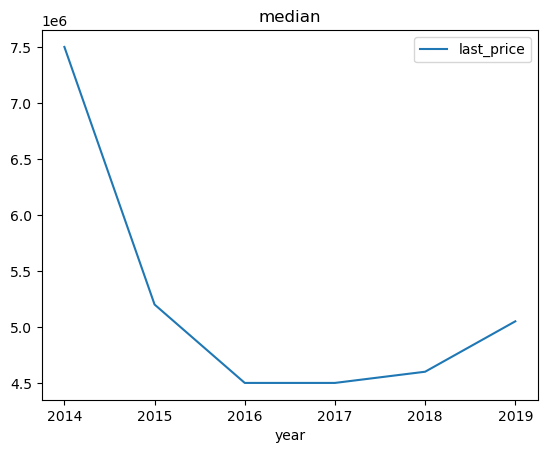

In [57]:
# Graph of price dependency on the date of apartment sale listing (day of the week, month, year)

data_factors.pivot_table(index='day_of_week',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')

data_factors.pivot_table(index='month',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median')

data_factors.pivot_table(index='year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

Analysis-wise, the dynamics of apartment prices based on the year of listing publication is significant. From 2014 to 2016, apartment prices were declining, but from 2016, they gradually started to rise. As for the dependence of apartment prices on the day and month of publication, it is not evident.

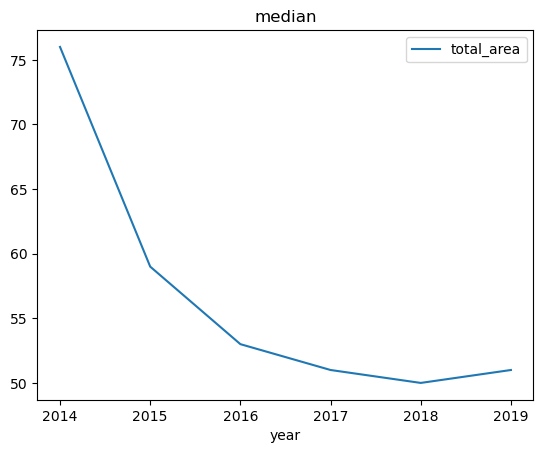

In [58]:
data_factors.pivot_table(index='year',values='total_area',aggfunc='median').plot(y='total_area', kind='line', title='median');

Indeed, the dynamics of changes in apartment area over the analyzed period show a similar pattern to the changes in prices of the sold apartments. However, there are some peculiarities. From 2014 to 2018, the area of sold apartments was decreasing, but from 2018, it began to increase. Thus, we can conclude that the price per square meter of apartments increased from 2016 to 2018, regardless of the area of the sold apartments.

#### 3.4. Identifying the localities with the highest and lowest cost per square meter

Calculate the average price per square meter in the top 10 localities with the highest number of listings. 

Identify the localities with the highest and lowest square meter prices. These data can be found by name in the column 'locality_name'.

In [59]:
# Compiling a list of the top 10 localities with the highest number of listings
rating = pd.pivot_table(data,
                     index='locality_name',
                     values=['last_price','total_area'], aggfunc = ['sum','count'])

rating.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
rating.sort_values(by=['last_price_count'],ascending=False, inplace=True)
rating_10 = rating.iloc[0:10]

# Adding a column with the average price per square meter.
rating_10['price_sq_m'] = round(rating_10['last_price_sum'] / rating_10['total_area_sum'])
                                 
# Sorting the table by price in descending order.
rating_10.sort_values(by=['price_sq_m'],ascending=False, inplace=True)

rating_10

,last_price_sum,total_area_sum,last_price_count,total_area_count,price_sq_m
locality_name,,,,,
Санкт-Петербург,103420588495,860485,13657,13657,120189.0
Пушкин,2076886434,19877,328,328,104487.0
деревня Кудрово,1021886125,11162,242,242,91550.0
поселок Парголово,1239737459,13986,276,276,88641.0
Петергоф,832003000,9698,188,188,85791.0
поселок Мурино,1675063489,20018,449,449,83678.0
поселок Шушары,1552313499,20275,376,376,76563.0
Колпино,1200884246,16020,303,303,74962.0
Гатчина,951449360,13851,275,275,68692.0


In [60]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,13657,5500000.0
поселок Мурино,449,3450000.0
поселок Шушары,376,3970000.0
Всеволожск,350,3500000.0
Пушкин,328,5200000.0
Колпино,303,3570000.0
поселок Парголово,276,4100000.0
Гатчина,275,3050000.0
деревня Кудрово,242,3700000.0


Apartments in St. Petersburg are the most expensive, while the cheapest ones are in Vsevolozhsk

In [61]:
nearest_top_sp = data.query('locality_name == "Санкт-Петербург"')
nearest_top_sp.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_kv_m,day_of_week,day_of_month,month,year,type_floor
0,20,13000000,108,2019-03-07,3,2.70,16,51.0,8,False,...,482,2,755.0,NaN,120370.37,3,7,March,2019,другой
2,10,5196000,56,2015-08-20,2,NaN,5,34.3,4,False,...,90,2,574.0,558.0,92785.71,3,20,August,2015,другой
4,2,10000000,100,2018-06-19,2,3.03,14,32.0,13,False,...,112,1,48.0,121.0,100000.00,1,19,June,2018,другой
9,18,5400000,61,2017-02-26,3,2.50,9,43.6,7,False,...,0,0,0,289.0,88524.59,6,26,February,2017,другой
10,5,5050000,39,2017-11-16,1,2.67,12,20.3,3,False,...,310,2,553.0,137.0,129487.18,3,16,November,2017,другой


#### 3.5. Counting apartments in St. Petersburg and calculating the average price per kilometer.

In [62]:
print('The number of apartments listed for sale in Saint Petersburg: ', len(nearest_top_sp))

The number of apartments listed for sale in Saint Petersburg:  13657


In [63]:
nearest_top_sp = nearest_top_sp[nearest_top_sp['city_centers_nearest'] != 0]
print('The number of apartments listed for sale in Saint Petersburg for which the distance to the city center is not specified: ', len(nearest_top_sp))

# Adding a column to the table with the average price per kilometer
nearest_top_sp['dist_price'] = round(nearest_top_sp['last_price'] / nearest_top_sp['city_centers_nearest'])

# Creating a table only with the data needed for analysis
nearest_top_sp = nearest_top_sp.reindex(columns=['last_price', 'city_centers_nearest', 'dist_price'])

# Sorting the table by apartment price in descending order
nearest_top_sp.sort_values(by=['city_centers_nearest'],ascending=True, inplace=True)

nearest_top_sp.head(5)

The number of apartments listed for sale in Saint Petersburg for which the distance to the city center is not specified:  13597


,last_price,city_centers_nearest,dist_price
8416,9555000,1,9555000.0
21188,9300000,1,9300000.0
1104,7970000,1,7970000.0
12533,9950000,1,9950000.0
16025,9000000,1,9000000.0


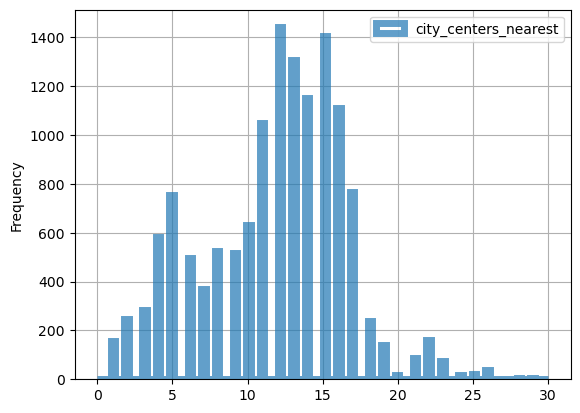

In [64]:
# Building a graph of the relationship between the apartment price and the distance to the city center.
nearest_top_sp.plot(
    kind='hist',
    x='last_price',
    y='city_centers_nearest',
    histtype='step',
    range=(0, 30),
    bins=100,
    linewidth=5,
    alpha=0.7,
    grid=True,
    legend=True,
);


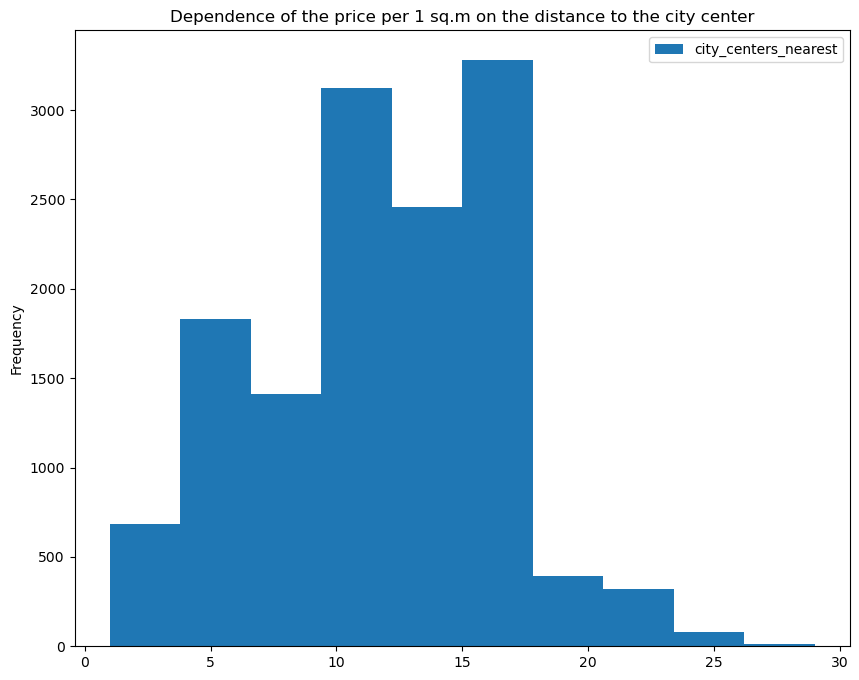

In [65]:
#Building a graph of the relationship between apartment price and distance to the city center
nearest_top_sp.plot(x='dist_price', y='city_centers_nearest', kind='hist', 
                 title='Dependence of the price per 1 sq.m on the distance to the city center', figsize=(10,8));

The graph reflects that the closer to the center, the higher the apartment's price; however, as we move further away (more than 16 km in this case), the dependence diminishes. Beyond 20 km, the distance to the center no longer has a significant impact on the apartment's price increase. However, comparing the overall price is not appropriate; let's plot a graph depicting the relationship between the average square meter price and the distance to the center.

The graph of the dependency between the price per square meter and the distance to the center shows the same trend. However, it's worth noting that within the range of 1 to 10 km, the price per square meter fluctuates. This suggests that other factors influencing real estate prices come into play in this range."

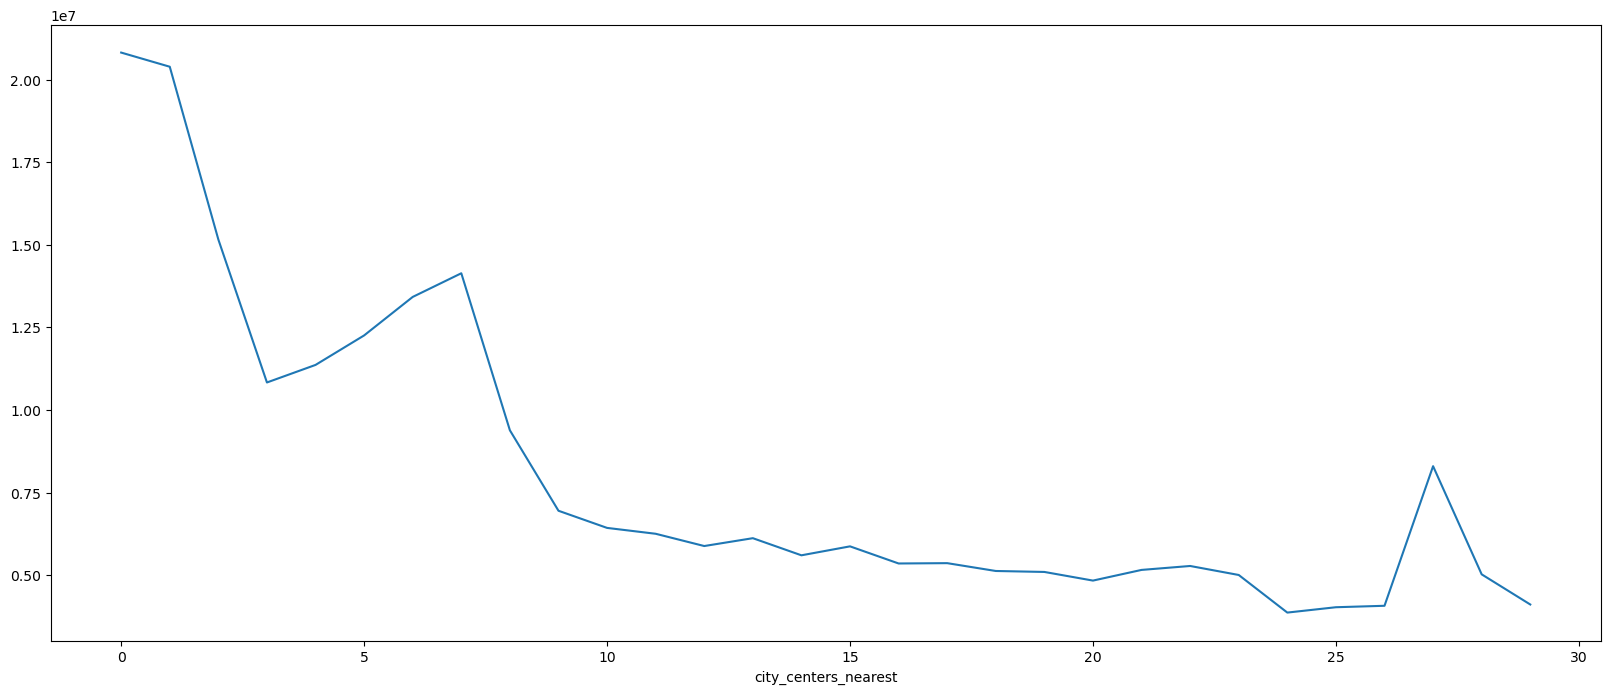

In [66]:
data[data['locality_name'] == 'Санкт-Петербург'].groupby('city_centers_nearest')['last_price'].mean().plot(figsize = (20, 8));

Conclusion from the graph: the closer to the city center, the higher the cost per square meter of the apartment being sold.

# 4. General Conclusion



The analysis of the provided data showed the following:

1. The majority of apartments for sale have a total area ranging from 25 sq. m to 75 sq. m, with the highest number of apartments having a total area between 40 and 50 sq. m. Apartments with a total area exceeding 150 sq. m are considered elite properties and make up a small portion of the total listings. Kitchen area for these apartments ranges from 5 to 14 sq. m, with the most common kitchen sizes being 7.9 and 11 sq. m. As kitchen area increases beyond this range, the number of listings decreases.

2. The most common price range for apartments for sale is from 3 to 5.5 million rubles. These apartments are typically one or two-bedroom units with a ceiling height of 2.5 meters. They are primarily located in low-rise buildings (five floors). Most apartments for sale are on floors that are not the first or the last, which is expected as there are fewer physically available apartments on these floors. The number of apartments on the first and last floors is not significantly different.

3. The top-selling apartments are in five-story buildings, followed by apartments in nine-story buildings (more than 3000 listings). Apartments in 12, 16, and 25-story buildings share the third position.

4. Apartments in the dataset are located within a range of 11 to 17 km from the city center, with the majority of apartments falling within 10 to 40 km from the airport. There are numerous parks in St. Petersburg and its surroundings, often within walking distance.

5. Price dynamics over the years is noteworthy. From 2014 to 2016, apartment prices decreased, but from 2016 onwards, they gradually began to rise. Most apartments are listed for sale in November, December, and February, with a decrease in business activity by May. On average, it takes 101 days to sell an apartment, with a sale within 44 days of listing considered relatively quick.

6. Apartments in St. Petersburg are the most expensive, while the cheapest ones are in Vsevolozhsk. The closer an apartment is to the city center, the higher the price per square meter.

These findings provide insights for understanding the real estate market in the region and can be used for various purposes, including pricing strategies and investment decisions.